# Overview y análisis de outliers

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

In [2]:
df = pd.read_csv('Data/clean_supercias_75K.csv')
df.head()

2020 2019  EXPEDIENTE                                             NOMBRE  \
0   1.0    1       384.0                          CORPORACION FAVORITA C.A.   
1   2.0    4      6796.0                                      ECUACORRIENTE   
2   3.0    3     93144.0                                   AURELIAN ECUADOR   
3   4.0    2    705547.0                                      SHAYA ECUADOR   
4   5.0    5     47845.0  CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...   

  TIPO COMPAÑIA                                ACTIVIDAD ECONÓMICA   REGION  \
0       ANÓNIMA  G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...   SIERRA   
1       ANÓNIMA  B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...  ORIENTE   
2       ANÓNIMA  B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...  ORIENTE   
3       ANÓNIMA  B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...   SIERRA   
4       ANÓNIMA  J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...    COSTA   

                                           PROVINCIA  \
0  PICHINCHA                                     ...   
1  ZAMORA CHINCHIPE                              ...   
2  ZAMORA CHINCHIPE                              ...   
3  PICHINCHA                                     ...   
4  GUAYAS                                        ...   

                                              CIUDAD  TAMAÑO  \
0  QUITO                                         ...  GRANDE   
1  EL PANGUI                                     ...  GRANDE   
2  LOS ENCUENTROS                                ...  GRANDE   
3  QUITO                                         ...  GRANDE   
4  GUAYAQUIL                                     ...  GRANDE   

               SECTOR  CANT. EMPLEADOS    ACTIVO2020  PATRIMONIO2020  \
0  MERCADO DE VALORES          10768.0  2.121860e+09    1.482973e+09   
1          SOCIETARIO            966.0  1.607423e+09    5.689866e+08   
2          SOCIETARIO           1451.0  1.599727e+09    6.052935e+08   
3          SOCIETARIO             92.0  1.354952e+09    7.868173e+08   
4          SOCIETARIO           2844.0  1.217718e+09    2.647091e+08   

   INGRESOS POR VENTA2020  UTILIDAD ANTES DE 2020  UTILIDAD DEL EJERCICIO2020  \
0            2.170603e+09             187168402.3                2.201981e+08   
1            0.000000e+00              -1387158.7                0.000000e+00   
2            3.587926e+08             -49399080.0               -4.939908e+07   
3            6.690761e+08             179317070.0                2.109613e+08   
4            1.066242e+09             174644376.0                2.048239e+08   

   UTILIDAD NETA2020  IR CAUSADO2020  INGRESO TOTAL2020  
0       1.474992e+08     41971212.00       2.170603e+09  
1      -2.633856e+06      1246697.02       0.000000e+00  
2      -4.939908e+07            0.00       3.588240e+08  
3       1.337093e+08     45607812.10       6.690761e+08  
4       1.068268e+08     67817626.00       1.071561e+09

## Categorical Review

In [3]:
# How many companies we have in the original dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75165 entries, 0 to 75164
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   2020                        75165 non-null  float64
 1   2019                        75165 non-null  object 
 2   EXPEDIENTE                  75165 non-null  float64
 3   NOMBRE                      75165 non-null  object 
 4   TIPO COMPAÑIA               75165 non-null  object 
 5   ACTIVIDAD ECONÓMICA         75165 non-null  object 
 6   REGION                      75165 non-null  object 
 7   PROVINCIA                   75165 non-null  object 
 8   CIUDAD                      75165 non-null  object 
 9   TAMAÑO                      75165 non-null  object 
 10  SECTOR                      75165 non-null  object 
 11  CANT. EMPLEADOS             75165 non-null  float64
 12  ACTIVO2020                  62489 non-null  float64
 13  PATRIMONIO2020              751

In [4]:
# How many unique company sectors there are registered?
df.SECTOR.unique()

array(['MERCADO DE VALORES', 'SOCIETARIO'], dtype=object)

In [5]:
# What are the sizing categories for companies according to SuperCias
df.TAMAÑO.unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA'], dtype=object)

In [6]:
# What are the company types we'll be working with
df["TIPO COMPAÑIA"].unique()

array(['ANÓNIMA', 'SUCURSAL  EXTRANJERA', 'RESPONSABILIDAD LIMITADA',
       'SOCIEDAD POR ACCIONES SIMPLIFICADA', 'ASOCIACIÓN O CONSORCIO',
       'ANÓNIMA  EN PREDIOS RÚSTICOS', 'ECONOMÍA MIXTA',
       'ANÓNIMA MULTINACIONAL ANDINA', 'COMANDITA POR ACCIONES'],
      dtype=object)

In [7]:
# How are the companies distributed in between such categories
proportion = df.groupby("TAMAÑO")['NOMBRE'].count()
proportion


TAMAÑO
GRANDE           2588
MEDIANA          6124
MICROEMPRESA    47787
PEQUEÑA         18666
Name: NOMBRE, dtype: int64

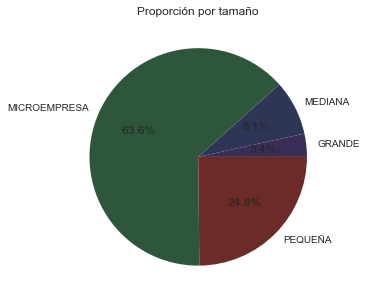

In [8]:
# Let's visualize
plot = proportion.plot.pie(y='NOMBRE', figsize=(5, 5), label="", 
colors= ["#3b2e56", "#2e3656", "#2e563b", "#6b2b26"] ,autopct='%1.1f%%', title="Proporción por tamaño")

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Número de empresas')

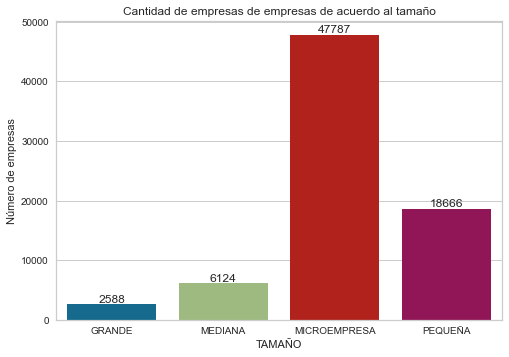

In [9]:
# Visualización que sí va
ax=sns.barplot(proportion.index, proportion.values)
ax.bar_label(ax.containers[0])  
plt.title("Cantidad de empresas de empresas de acuerdo al tamaño")
plt.ylabel("Número de empresas")

In [10]:
# What is the impact/influence of the top companies on the Ecuadorian workforce according to the Dataset
top_1000 = df.head(1000)
rest = df[1000:]
total_emp = df["CANT. EMPLEADOS"].sum()
top_emp = top_1000["CANT. EMPLEADOS"].sum()
rest_emp = rest["CANT. EMPLEADOS"].sum()

top_perc = top_emp/total_emp
rest_perc = rest_emp/total_emp

print(top_emp, rest_emp)
print(round(top_perc, 2), round(rest_perc, 2))


349970.0 1090847.0
0.24 0.76


In [11]:
# Let's create a small DataFrame to visualize
workforce = pd.DataFrame({'EMPLEADOS': [top_emp, rest_emp]}, index=['Top_1000', 'Rest_emp'])
workforce

EMPLEADOS
Top_1000   349970.0
Rest_emp  1090847.0

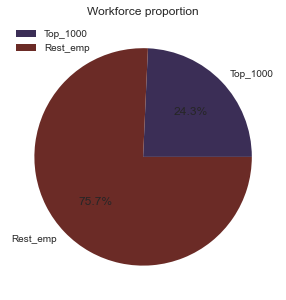

In [12]:
workplot = workforce.plot.pie(y='EMPLEADOS', figsize=(5, 5), label="", 
colors= ["#3b2e56",  "#6b2b26"] ,autopct='%1.1f%%', title="Workforce proportion")

In [13]:
# Let's take a look at the number of companies with less than 10 employees
df.loc[df["CANT. EMPLEADOS"] < 10].shape

(62178, 20)

## Numerical Review

In [14]:
# Let's check the mean and std for income column
describe_income = df['INGRESOS POR VENTA2020'].describe()
mean_income = describe_income['mean']
std_income = describe_income['std']
round(std_income, 2)

16184600.78

In [15]:
# Making sure the rows with no income (makes no sense) don't interfere with our distribution analysis to much
df.loc[df["INGRESOS POR VENTA2020"] == 0, "INGRESOS POR VENTA2020"] = mean_income

In [16]:
# How many companies reported income's above the mean
above_comp = df[df['INGRESOS POR VENTA2020'] > mean_income].shape[0]
above_comp

7151

In [17]:
# What is their percentaje
perc_above_avg = round((above_comp/df.shape[0]) * 100, 2)
perc_above_avg

9.51

Text(0.5, 1.0, 'Distribución de compañías por ingresos')

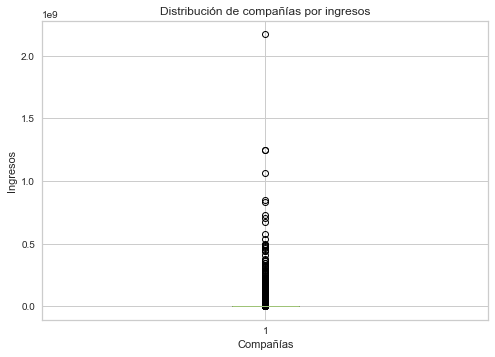

In [18]:
# Let's visualize the distribution
plt.boxplot(df['INGRESOS POR VENTA2020'])
plt.xlabel("Compañías")
plt.ylabel("Ingresos")
plt.title("Distribución de compañías por ingresos")

## Standarization and Outlier analysis

### Standarization

In [19]:
# Let's first get a z-score column for income
df['income_zscore'] = (df['INGRESOS POR VENTA2020'] - mean_income) / std_income
df['income_zscore']

0        134.037900
1          0.000000
2         22.091352
3         41.262877
4         65.802613
            ...    
75160      0.000000
75161      0.000000
75162      0.000000
75163      0.000000
75164      0.000000
Name: income_zscore, Length: 75165, dtype: float64

In [20]:
# Now let's visualize the same income distribution but with no outliers
df_no_out = df[ abs(df['income_zscore'])< 3 ]
df_no_out


2020  2019  EXPEDIENTE                 NOMBRE  \
1          2.0     4      6796.0          ECUACORRIENTE   
16        17.0    15     56871.0     INMOBILIARIA MOTKE   
17        18.0    14    707891.0        DPWORLD POSORJA   
22        23.0    21    159851.0          PDVSA ECUADOR   
29        30.0    30    118480.0            AMOVECUADOR   
...        ...   ...         ...                    ...   
75160  75647.0     -    734234.0            FMOTOR C.L.   
75161  75648.0     -    734328.0   AGROMORENO CIA.LTDA.   
75162  75649.0     -    734435.0    SUNINVEST CIA.LTDA.   
75163  75650.0     -    734896.0  INNOMED-QRS CIA.LTDA.   
75164  75651.0  7949    735411.0  ECUADORIANTRANSACTION   

                  TIPO COMPAÑIA  \
1                       ANÓNIMA   
16                      ANÓNIMA   
17                      ANÓNIMA   
22                      ANÓNIMA   
29                      ANÓNIMA   
...                         ...   
75160  RESPONSABILIDAD LIMITADA   
75161  RESPONSABILIDAD LIMITADA   
75162  RESPONSABILIDAD LIMITADA   
75163  RESPONSABILIDAD LIMITADA   
75164                   ANÓNIMA   

                                     ACTIVIDAD ECONÓMICA   REGION  \
1      B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...  ORIENTE   
16     L6810.01 - COMPRA - VENTA, ALQUILER Y EXPLOTAC...    COSTA   
17     F4290.11 - CONSTRUCCIÓN DE VÍAS DE NAVEGACIÓN,...    COSTA   
22     B0610.00 - EXTRACCIÓN DE ACEITES CRUDOS DE PET...   SIERRA   
29     J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...   SIERRA   
...                                                  ...      ...   
75160  G4510.01 - VENTA DE VEHÍCULOS NUEVOS Y USADOS:...    COSTA   
75161          A0122.01 - CULTIVO DE BANANOS Y PLÁTANOS.   SIERRA   
75162  K6420.00 - ACTIVIDADES DE SOCIEDADES DE CARTER...   SIERRA   
75163  P8549.11 - ACTIVIDADES DE ENSEÑANZA QUE NO PUE...   SIERRA   
75164  G4690.00 - VENTA AL POR MAYOR DE DIVERSOS PROD...   SIERRA   

                                               PROVINCIA  \
1      ZAMORA CHINCHIPE                              ...   
16     GUAYAS                                        ...   
17     GUAYAS                                        ...   
22     PICHINCHA                                     ...   
29     PICHINCHA                                     ...   
...                                                  ...   
75160  GUAYAS                                        ...   
75161  AZUAY                                         ...   
75162  AZUAY                                         ...   
75163  PICHINCHA                                     ...   
75164  PICHINCHA                                     ...   

                                                  CIUDAD        TAMAÑO  ...  \
1      EL PANGUI                                     ...        GRANDE  ...   
16     GUAYAQUIL                                     ...        GRANDE  ...   
17     GUAYAQUIL                                     ...        GRANDE  ...   
22     QUITO                                         ...       MEDIANA  ...   
29     QUITO                                         ...  MICROEMPRESA  ...   
...                                                  ...           ...  ...   
75160  GUAYAQUIL                                     ...  MICROEMPRESA  ...   
75161  CUENCA                                        ...  MICROEMPRESA  ...   
75162  CUENCA                                        ...  MICROEMPRESA  ...   
75163  QUITO                                         ...  MICROEMPRESA  ...   
75164  QUITO                                         ...  MICROEMPRESA  ...   

      CANT. EMPLEADOS    ACTIVO2020  PATRIMONIO2020  INGRESOS POR VENTA2020  \
1               966.0  1.607423e+09     568986647.0            1.252873e+06   
16               12.0  5.170639e+08      60910230.6            3.481724e+07   
17              567.0  5.039392e+08      63840687.0            2.950014e+07   
22               12.0  4.334301e+08      82505294.8            1.

Text(0.5, 1.0, 'Distribución de compañías por ingresos')

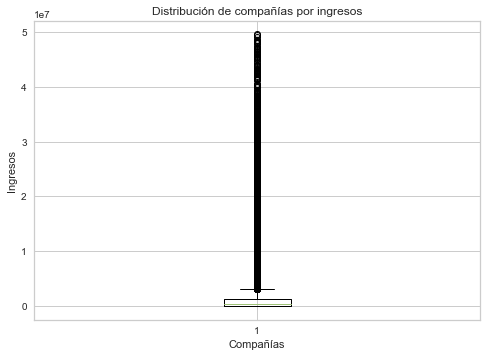

In [21]:
# Now let's visualize the same income distribution but with no outliers
plt.boxplot(df_no_out['INGRESOS POR VENTA2020'])
plt.xlabel("Compañías")
plt.ylabel("Ingresos")
plt.title("Distribución de compañías por ingresos")

It's better but it's bad. This is due to having a very big standard deviation in the income values as given by the SUPERCIAS data set.

### Outlier Analysis

In [22]:
# Let's take a look at the positive outliers (those with a bigger than 3 z-score)
df_pos_out = df[ df['income_zscore'] > 3 ]

In [23]:
# Let's see how many positive outliers we have
df_pos_out.shape[0]

288

In [24]:
# Let's check the mean and std as well as typical cetral tendency measures
df_pos_out['INGRESOS POR VENTA2020'].describe()

count    2.880000e+02
mean     1.559265e+08
std      2.059239e+08
min      4.998650e+07
25%      6.480444e+07
50%      9.102075e+07
75%      1.479454e+08
max      2.170603e+09
Name: INGRESOS POR VENTA2020, dtype: float64

In [25]:
# Now, let's compare those measurements to the negative outliers
df[ df['income_zscore'] < -3].shape[0]

0

There are some interesting implications about the dataset not having any negative outliers (more in Preliminary Observations section).

In [26]:
# Finally let's check how much percentage of income is earned by the positive outliers in comparison to ALL other companies
df_pos_out_income = df_pos_out['INGRESOS POR VENTA2020'].sum()
df_no_out_income = df_no_out['INGRESOS POR VENTA2020'].sum()
df_total_income = df['INGRESOS POR VENTA2020'].sum()
out_income_percentaje = (df_pos_out_income / df_total_income) *100
out_income_percentaje

35.98524082457054

## Preliminary observations

### Preliminary thoughs

After exploring the data set, we can conclude that, in it, there is a heavily squewed distribution when it comes to profits for companies; where less than 10% of the companies are above the mean, but the amount of profit they generate is big enough in value that it pulls the mean upwards significantly.

The disparity of income is evidenced not only by what's discussed above but also because of how disperse is de data. There's a standard deviation of $16,163,692.45 (pretty big). 

Another interesting insight is that there are NO negative outliers (values with less than -3 with a z-score) while there are 288 positive outliers. This in conjunction with what we are discussing about the squewed distribution mean that most companies lie at the bottom of income values but the top companies win a disproportionate amount in comparison when it comes to the Dataset. This is to be expected in most markets. We confirmed this by seeing how 35.99% of ALL income comes from the positive outliers.

While it might be tempting to simply get rid of outliers this might very well prove to be a mistake. Getting rid of the top companies to minimize the bias might not be the best solutions since we are going to loose to top players (bigger companies, significant actors, etc) in the workforce according to SUPERCIAS.

# Distribución inter-regional en cuanto a la cantidad de contrato

## Setup

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import yellowbrick
import seaborn as sns

In [28]:
df = pd.read_csv('Data/rankingCVSV.csv',sep=';', encoding='latin')
df.head()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2020 2019  EXPEDIENTE                                             NOMBRE  \
0   1.0    1       384.0                          CORPORACION FAVORITA C.A.   
1   2.0    4      6796.0                                 ECUACORRIENTE S.A.   
2   3.0    3     93144.0                               AURELIAN ECUADOR S.A   
3   4.0    2    705547.0                                 SHAYA ECUADOR S.A.   
4   5.0    5     47845.0  CONSORCIO ECUATORIANO DE TELECOMUNICACIONES S....   

  TIPO COMPAÑIA                                ACTIVIDAD ECONÓMICA   REGION  \
0       ANÓNIMA  G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...   SIERRA   
1       ANÓNIMA  B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...  ORIENTE   
2       ANÓNIMA  B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...  ORIENTE   
3       ANÓNIMA  B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...   SIERRA   
4       ANÓNIMA  J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...    COSTA   

                                           PROVINCIA  \
0  PICHINCHA                                     ...   
1  ZAMORA CHINCHIPE                              ...   
2  ZAMORA CHINCHIPE                              ...   
3  PICHINCHA                                     ...   
4  GUAYAS                                        ...   

                                              CIUDAD  TAMAÑO  \
0  QUITO                                         ...  GRANDE   
1  EL PANGUI                                     ...  GRANDE   
2  LOS ENCUENTROS                                ...  GRANDE   
3  QUITO                                         ...  GRANDE   
4  GUAYAQUIL                                     ...  GRANDE   

               SECTOR CANT. EMPLEADOS        ACTIVO2020  PATRIMONIO2020  \
0  MERCADO DE VALORES       10,768.00  2,121,860,458.59  1,482,973,135.   
1          SOCIETARIO          966.00  1,607,423,376.00   568,986,647.0   
2          SOCIETARIO        1,451.00  1,599,727,165.00   605,293,529.0   
3          SOCIETARIO           92.00  1,354,952,445.00   786,817,297.0   
4          SOCIETARIO        2,844.00  1,217,718,379.00   264,709,114.0   

  INGRESOS POR VENTA2020 UTILIDAD ANTES DE 2020 UTILIDAD DEL EJERCICIO2020  \
0         2,170,602,774.          187,168,402.3             220,198,120.31   
1                   0.00          -1,387,158.70                       0.00   
2          358,792,587.0          -49,399,080.0             -49,399,080.00   
3          669,076,072.0          179,317,070.0             210,961,259.00   
4         1,066,241,897.          174,644,376.0             204,823,940.00   

  UTILIDAD NETA2020 IR CAUSADO2020 INGRESO TOTAL2020  
0    147,499,234.25  41,971,212.00  2,170,602,774.93  
1     -2,633,855.70   1,246,697.02              0.00  
2    -49,399,080.00           0.00    358,823,965.00  
3    133,709,258.00  45,607,812.10    669,076,072.00  
4    106,826,750.00  67,817,626.00  1,071,561,214.00

## Cleaning

### Eliminating NaN

In [29]:
# For now, we'll use the strategy of ignoring companies whose values are not available
df.dropna(inplace=True)
df.head(1)

2020 2019  EXPEDIENTE                     NOMBRE TIPO COMPAÑIA  \
0   1.0    1       384.0  CORPORACION FAVORITA C.A.       ANÓNIMA   

                                 ACTIVIDAD ECONÓMICA  REGION  \
0  G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...  SIERRA   

                                           PROVINCIA  \
0  PICHINCHA                                     ...   

                                              CIUDAD  TAMAÑO  \
0  QUITO                                         ...  GRANDE   

               SECTOR CANT. EMPLEADOS        ACTIVO2020  PATRIMONIO2020  \
0  MERCADO DE VALORES       10,768.00  2,121,860,458.59  1,482,973,135.   

  INGRESOS POR VENTA2020 UTILIDAD ANTES DE 2020 UTILIDAD DEL EJERCICIO2020  \
0         2,170,602,774.          187,168,402.3             220,198,120.31   

  UTILIDAD NETA2020 IR CAUSADO2020 INGRESO TOTAL2020  
0    147,499,234.25  41,971,212.00  2,170,602,774.93

Now we need to clean certain nonsensical unique values in the columns "TAMAÑO" and "SECTOR". We found those by cheching each column with df["column_name"].unique()

### "SECTOR" Column

In [30]:
# SECTOR unique values
df["SECTOR"].unique()

array(['MERCADO DE VALORES', 'SOCIETARIO', 'MERCADO DE '], dtype=object)

In [31]:
# We check which companies have the non-sensical value in "SECTOR"
df.loc[df.SECTOR == "MERCADO DE ", "NOMBRE"]

943     DILIPA, DISTRIBUIDORA DE LIBROS Y PAPELERIA C....
3374                          CASA DE VALORES ADVFIN S.A.
Name: NOMBRE, dtype: object

In [32]:
def clean_sector(row):
  if(row == "MERCADO DE "):
    return "MERCADO DE VALORES"
  return row

df["SECTOR"] = df["SECTOR"].apply(clean_sector)

In [33]:
df.SECTOR.unique()

array(['MERCADO DE VALORES', 'SOCIETARIO'], dtype=object)

### "TAMAÑO" Column

In [34]:
# "TAMAÑO" unique values
df["TAMAÑO"].unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA', 'MICROEMPRES'],
      dtype=object)

In [35]:
# We check which companies have the non-sensical value in "TAMAÑO" (271 companies)
df.loc[df.TAMAÑO == "MICROEMPRES", "NOMBRE"].shape

(273,)

In [36]:
def clean_tamano(row):
  if(row == "MICROEMPRES"):
    return "MICROEMPRESA"
  return row

df["TAMAÑO"] = df["TAMAÑO"].apply(clean_tamano)

In [37]:
# We make sure it's clean now (0 companies)
df.loc[df.TAMAÑO == "MICROEMPRES", "NOMBRE"].shape

(0,)

In [38]:
df.TAMAÑO.unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA'], dtype=object)

### Misc

"CORPORACIÓN EL ROSADO" is one of the biggest companies in Ecuador, so we know it's impossible that it only has 3 employees, regardless of what the SuperCIAS say in their 
report. 

After some investigation, there is a another report by the SuperCias that show the real number of employees from "EL ROSADO".

In [39]:
# We change the original value of employees to the actual value
df.loc[8, "CANT. EMPLEADOS"]

'3.00'

In [40]:
df.loc[8, "CANT. EMPLEADOS"] = 7334

In [41]:
df.loc[8, "CANT. EMPLEADOS"]

7334

## Data Type Conversion

In [42]:
# Convert columns to a more appropiate data type 
df = df.convert_dtypes()
df.dtypes

2020                           Int64
2019                          string
EXPEDIENTE                     Int64
NOMBRE                        string
TIPO COMPAÑIA                 string
ACTIVIDAD ECONÓMICA           string
REGION                        string
PROVINCIA                     string
CIUDAD                        string
TAMAÑO                        string
SECTOR                        string
CANT. EMPLEADOS               object
ACTIVO2020                    object
PATRIMONIO2020                string
INGRESOS POR VENTA2020        string
UTILIDAD ANTES DE 2020        string
UTILIDAD DEL EJERCICIO2020    string
UTILIDAD NETA2020             string
IR CAUSADO2020                string
INGRESO TOTAL2020             string
dtype: object

In [43]:
# Create numerical column of employees per company
df['CANT. EMPLEADOS'] = df['CANT. EMPLEADOS'].str.replace(',','')
df['CANT. EMPLEADOS'] = pd.to_numeric(df['CANT. EMPLEADOS'])

## First Business Question
1. ¿How is the quantity of employees distributed across the different ecuadorian regions? ¿How to/should we factor in company size? 

### Exploration

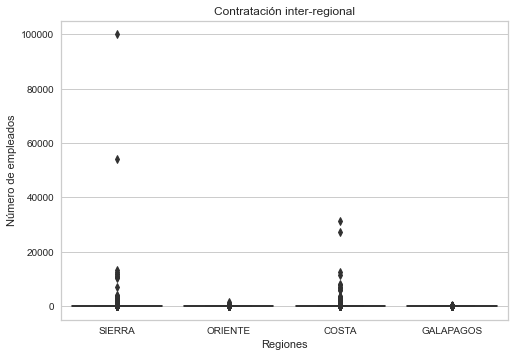

In [44]:
# The first things is to see the data as it is. Let's take a look at the distribution of employees when pitted agains ecuadorian regions.
#sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df).set_title('Inter-regional hirings')
ax= sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df).set(title="Contratación inter-regional", xlabel="Regiones", ylabel="Número de empleados")

plt.show()

#### Plot Analysis:
This result might seem discouraging, however it might conceal some important insights. One can see that there are a couple of points that go well beyond the box in all 4 ecuadorian regions; most notably "SIERRA" and "COSTA". 

Normally, an analysis and treatment to eliminate outliers might be in order, however, outliers in this regard are imporant, they represent (usually) the most important (and big in terms of hiring) companies of the country. So cutting them out is out of the question.

This unreadable chart might have to do something with most of businesses having very few employees. Let's take a closer look.

Text(0.5, 1.0, 'Inter-regional hirings (less than 10 employees)')

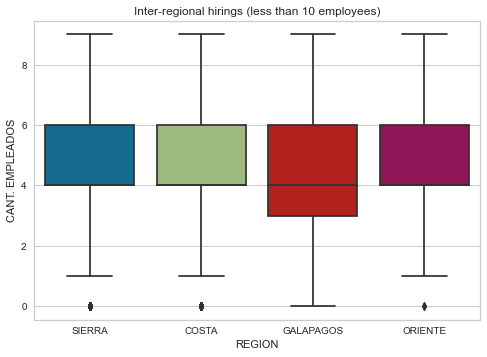

In [45]:
# Let's create a copy of the original data frame in order to visualize only companies with less than 10 employees
df2 = df.loc[df["CANT. EMPLEADOS"] < 10]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df2).set_title('Inter-regional hirings (less than 10 employees)')

In [46]:
# Let's compare the number companies above 10,000 employees vs the number of companies with less than 10.
num_big_comp = str(df.loc[ df["CANT. EMPLEADOS"] >= 10000, "NOMBRE"].shape[0])
num_small_comp = str(df.loc[ df["CANT. EMPLEADOS"] < 10, "NOMBRE"].shape[0])
print("Number of companies with 10,000 or more employees: " + num_big_comp + "\nNumber of companies with less than 10 employees: " + num_small_comp)

Number of companies with 10,000 or more employees: 13
Number of companies with less than 10 employees: 62178


#### Plot Analysis and data analysis
This validates our previous suspicions. The first plot was graphically squashed due to the giant disparity between the amount of employees that companies hold. Almost all companies (82.72%) have less than 10 workers in our Dataset however the "outliers" having more than 10,000 employees represent a fundamental part of the ecuadorian workforce, therefore, should not be eliminated.

#### Course of action
Taking into account company size will help visualize the distribution of workers accross regions better, in other words, let's take into account the size size of the company as well.

In [47]:
# First let's take a look at the standard deviation depending on region
df[["REGION", "CANT. EMPLEADOS"]].groupby("REGION").agg('std')

CANT. EMPLEADOS
REGION                    
COSTA           255.032530
GALAPAGOS        20.317047
ORIENTE          47.301414
SIERRA          642.850603

In [48]:
# Now let's take a look at the standard deviation between regions taking into account size of the company
df[["TAMAÑO", "REGION", "CANT. EMPLEADOS"]].groupby(["REGION", "TAMAÑO"]).agg('std')

CANT. EMPLEADOS
REGION    TAMAÑO                       
COSTA     GRANDE             965.770662
          MEDIANA             44.251405
          MICROEMPRESA        80.846087
          PEQUEÑA            325.933751
GALAPAGOS GRANDE                    NaN
          MEDIANA             31.476068
          MICROEMPRESA         5.629651
          PEQUEÑA              9.498558
ORIENTE   GRANDE             407.419235
          MEDIANA             28.848805
          MICROEMPRESA         4.999994
          PEQUEÑA             10.690359
SIERRA    GRANDE            2937.556695
          MEDIANA            225.397981
          MICROEMPRESA       407.947178
          PEQUEÑA            111.646027

#### Data analysis:
This might seem impossible or counter-intuitive at first. How is it possible that by grouping together companies by size the deviation dramatically increases compared to when it is not grouped by size? In reality the data it's trying to tell us that there's even more disparity in the amount of employees that companies of the same size have than when we ignore sizes all together.

This might mean that there are serious outliers within the categories of "TAMAÑO", when it comes to employees. Maybe the SuperCias doesn't prioritize number of employees as a factor for categorizing companies in size. 

Text(0.5, 1.0, 'Inter-regional hirings ("GRANDE")')

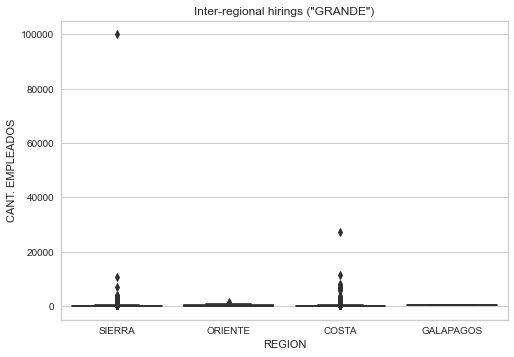

In [49]:
# Let's confirm our suspicions of intra-company-size outliers.
df3 = df.loc[df["TAMAÑO"] == "GRANDE"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df3).set_title('Inter-regional hirings ("GRANDE")')

Text(0.5, 1.0, 'Inter-regional hirings ("MEDIANA")')

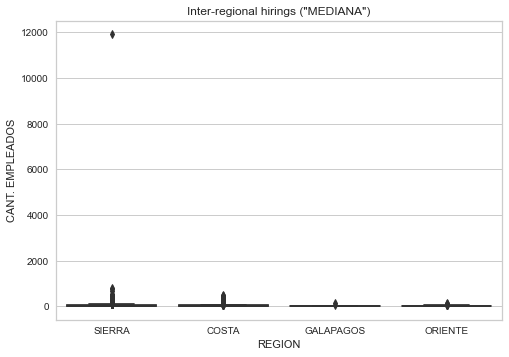

In [50]:
df4 = df.loc[df["TAMAÑO"] == "MEDIANA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df4).set_title('Inter-regional hirings ("MEDIANA")')

Text(0.5, 1.0, 'Inter-regional hirings ("MICROEMPRESA")')

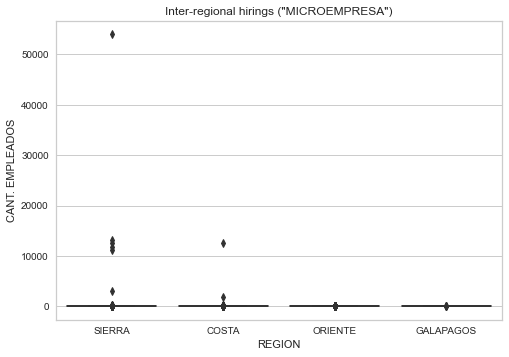

In [51]:
df5 = df.loc[df["TAMAÑO"] == "MICROEMPRESA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df5).set_title('Inter-regional hirings ("MICROEMPRESA")')

Text(0.5, 1.0, 'Inter-regional hirings ("PEQUEÑA")')

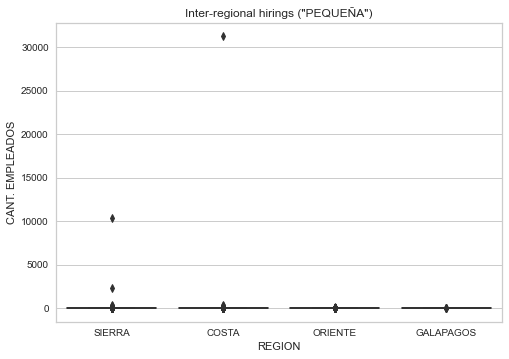

In [52]:
df6 = df.loc[df["TAMAÑO"] == "PEQUEÑA"]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df6).set_title('Inter-regional hirings ("PEQUEÑA")')

#### Course of action 
Create our own size of company column based on number of employees alone.

In [53]:
df['TAMANO_EMPLEADOS'] = pd.qcut(df["CANT. EMPLEADOS"], 5 ,labels=['MICROEMPRESA','PEQUEÑA', 'MEDIANA', 'GRANDE'], duplicates='drop')

In [54]:
df.groupby(["TAMANO_EMPLEADOS", "REGION"])["CANT. EMPLEADOS"].count()


TAMANO_EMPLEADOS  REGION   
MICROEMPRESA      COSTA        20695
                  GALAPAGOS      226
                  ORIENTE       1346
                  SIERRA       17467
PEQUEÑA           COSTA         7086
                  GALAPAGOS       74
                  ORIENTE        490
                  SIERRA        6351
MEDIANA           COSTA         3325
                  GALAPAGOS       41
                  ORIENTE        245
                  SIERRA        3170
GRANDE            COSTA         7086
                  GALAPAGOS       48
                  ORIENTE        250
                  SIERRA        7264
Name: CANT. EMPLEADOS, dtype: int64

In [55]:
df.groupby("TAMANO_EMPLEADOS")["CANT. EMPLEADOS"].agg('std')


TAMANO_EMPLEADOS
MICROEMPRESA       0.810450
PEQUEÑA            0.476345
MEDIANA            0.499967
GRANDE          1063.884133
Name: CANT. EMPLEADOS, dtype: float64

#### Analysis
With this we can observe that there is a huge disparity in employee number in the top quartile of companies while and values seem quite uniform in the remaining 3 quartiles. Most disparity in employee quantity happens in the top companies.

#### Course of action
We'll take a look at the distribution of quantity of employees for the first 3 quartiles first and then well take a look at the last quartile separately.

### First Quartile

In [56]:
df_q1 = df.loc[df["TAMANO_EMPLEADOS"] == "MICROEMPRESA"]
df_q1.shape

(39734, 21)

0.8104501380515791

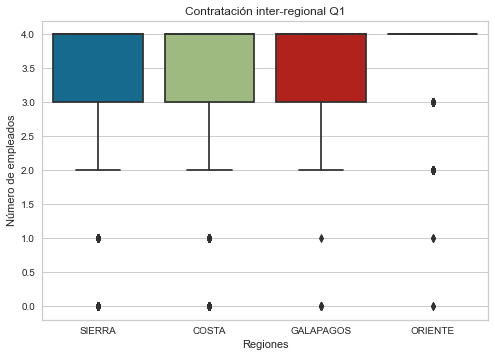

In [57]:
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df_q1).set(title="Contratación inter-regional Q1", xlabel="Regiones", ylabel="Número de empleados")
df_q1["CANT. EMPLEADOS"].std()

In [58]:
df_q1[["CANT. EMPLEADOS", "REGION"]].groupby("REGION").mean()

CANT. EMPLEADOS
REGION                    
COSTA             3.531433
GALAPAGOS         3.411504
ORIENTE           3.725854
SIERRA            3.478159

In [59]:
# Cuantificaci´n de resultados
comp_cuat_emp= df_q1.loc[df_q1["CANT. EMPLEADOS"] == 4].shape[0]
comp_tres_emp= df_q1.loc[df_q1["CANT. EMPLEADOS"] == 3].shape[0]
comp_dos_emp= df_q1.loc[df_q1["CANT. EMPLEADOS"] == 2].shape[0]
comp_un_emp= df_q1.loc[df_q1["CANT. EMPLEADOS"] == 1].shape[0]
porc_dos = comp_dos_emp / df_q1.shape[0]
porc_un = comp_un_emp / df_q1.shape[0]


comp_dos_emp
porc_dos

comp_un_emp
porc_un

0.012910857200382543

#### First Quartile Analysis
We can now see that, when it comes to "MICROEMPRESA", most companies in "SIERRA", "COSTA" and "GALAPAGOS" have around 3-4 employees in out Dataset. We can deduce that the aberrant values that present 0 empoyees should not be taken into account. 

The companies that have 2 employees are equal to 4249 (10.69% of this quartile), the companies that have 1 employee are only 513 (1.29%) of the ones in the Dataset. 

We can also se that "ORIENTE" does not fall into the same trend as the other regions of Ecuador when it comes to the amount of employees the companies have (by our definition, very few "MICROEMPRESAS"), and thanks to the previous exploration we know that this doesn't necesarily mean that "ORIENTE" has few "MICROEMPRESAS"(1346, 3rd place). They just tend to have a different employee number.

This is particulary interesting considering they have relatively similar means (3<mean<4)

### Second Quartile

In [60]:
df_q2 = df.loc[df["TAMANO_EMPLEADOS"] == "PEQUEÑA"]
df_q2.shape

(14001, 21)

0.4763450951441411

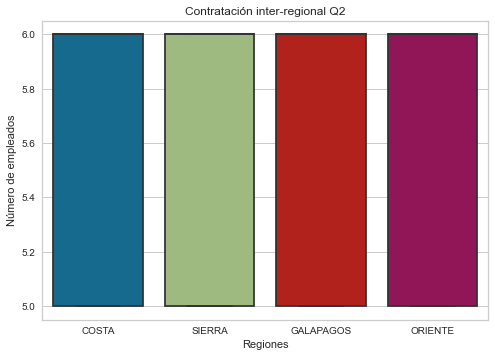

In [61]:
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df_q2).set(title="Contratación inter-regional Q2", xlabel="Regiones", ylabel="Número de empleados")
df_q2["CANT. EMPLEADOS"].std()

In [62]:
# Let's see if there's a single company in the second quartile with more than 6 employees
df_q2.loc[df["CANT. EMPLEADOS"] > 6].shape

(0, 21)

In [63]:
df_q2.loc[df["CANT. EMPLEADOS"] < 5].shape

(0, 21)

In [64]:
df_q2[["CANT. EMPLEADOS", "REGION"]].groupby("REGION").mean()

CANT. EMPLEADOS
REGION                    
COSTA             5.678803
GALAPAGOS         5.689189
ORIENTE           5.679592
SIERRA            5.619587

In [65]:
# Let's see how many companies have 5 employees and how many have 6
df_q2.groupby("CANT. EMPLEADOS")["NOMBRE"].count()

CANT. EMPLEADOS
5.0    4872
6.0    9129
Name: NOMBRE, dtype: int64

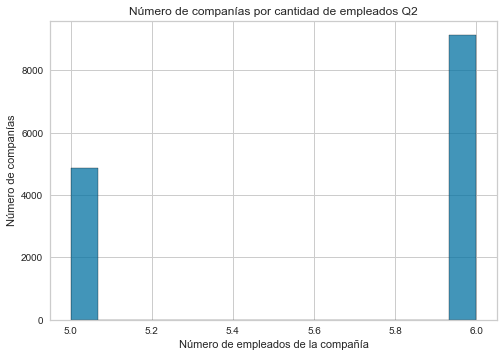

In [66]:
ax =sns.histplot(df_q2["CANT. EMPLEADOS"]).set(title="Número de companías por cantidad de empleados Q2", xlabel="Número de empleados de la compañía", ylabel="Número de companías")

#### Second Quartile Analysis

This results show that the entirity of the second quartile for ALL regions have either 5 or 6 employees in Ecuador, where 34.8% (4872) of companies in "PEQUENA" hold 5 employees and nearly 65.2% (9129) hold 6.

### Third Quartile

In [67]:
df_q3 = df.loc[df["TAMANO_EMPLEADOS"] == "MEDIANA"]
df_q3.shape

(6781, 21)

0.49996743789263987

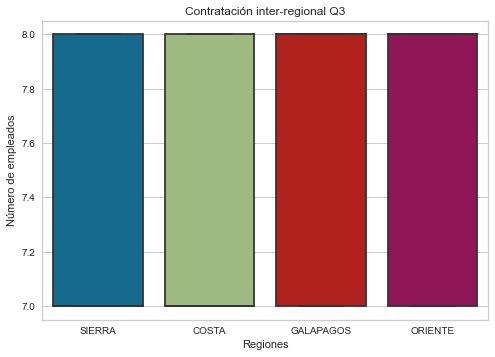

In [68]:
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data=df_q3).set(title="Contratación inter-regional Q3", xlabel="Regiones", ylabel="Número de empleados")
df_q3["CANT. EMPLEADOS"].std()

#### Analysis
At this point we can confirm this trend. In this quartile all companies have either 7 or 8 employees. Making it so that even when we grouped registers by quantiles all significant variation comes from the top 25% of companies when it comes to employee number, regardless of region.

To confirm this, let's visulize the las quartile.

### Last Quartile

In [69]:
df_q4 = df.loc[df["TAMANO_EMPLEADOS"] == "GRANDE"]
df_q4.shape

(14648, 21)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Inter-regional hirings (last quartile)'),
 Text(0.5, 0, 'Cantidad de empleados')]

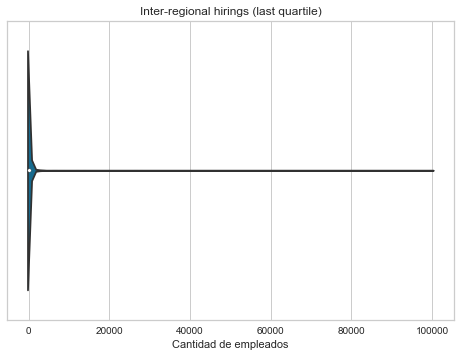

In [70]:
sns.violinplot(df_q4["CANT. EMPLEADOS"]).set(title='Inter-regional hirings (last quartile)', xlabel='Cantidad de empleados')

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Inter-regional hirings (last quartile, less than 100)'),
 Text(0.5, 0, 'Cantidad de empleados')]

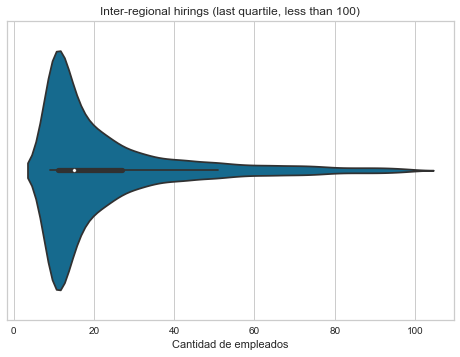

In [71]:
sns.violinplot(df_q4["CANT. EMPLEADOS"].loc[df["CANT. EMPLEADOS"]< 100], ylabel="asdfasdf").set(title='Inter-regional hirings (last quartile, less than 100)', xlabel='Cantidad de empleados')

In [72]:
df_q4[df_q4["CANT. EMPLEADOS"] < 100].shape[0]

13200

In [73]:
df_q4.shape[0]


# 90.11% of companies in the las quartile have less than 100 employees

14648

#### Analysis
With these two violin plots we can visualize that most registers in the "GRANDE" category are under 100. Most of the data well find in double digits even if the significant "players" represent an important factor in the worforce. 


### General

Text(0.5, 1.0, 'Inter-regional hirings (less than 12 employees)')

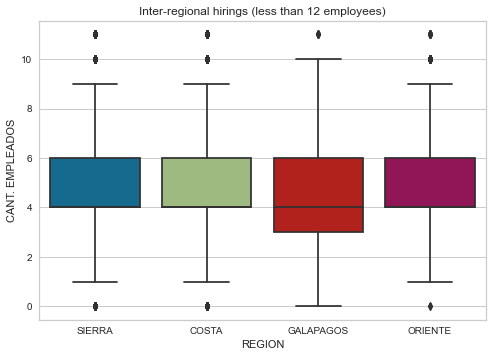

In [74]:
# A more reasonable boxplot for distributions is:
alt = df.loc[df["CANT. EMPLEADOS"] < 12 ]
sns.boxplot(x="REGION", y="CANT. EMPLEADOS", data= alt).set_title('Inter-regional hirings (less than 12 employees)')

#### Analysis
Since more than 80% of all our companies are below 10 employees in out Dataset, when we examine their distribution, we can start to appreciate that region wise the trends are similar, with the exception of "GALAPAGOS". In fact, visually "SIERRA", "COSTA" and "ORIENTE" look identical at first glance.

All regions lest "GALAPAGOS" tend to predominantly have from 4 to 6 employees making such range the entire last quartile. "GALAPAGOS" however, seems to have a more even (simetric) distribution than the other regions. It's not really simetric by anymeans, it clearly presents tilting towards the third quartile (4-6 employees, like the rest of the country) however we can atleast visualy apprecieate the second quartile.

We can also apreciate that passed, 9 employees values tend to appear more as outliers, sparse and erratic, instead of actual the actual body of the box. However "GALAPAGOS" extend the whisquers of the box up to 10 employees whereas every other region only up to 9. 

This could mean a number of things, maybe, because Galapagos is heavily regulated due to it being a turistic uggernaugh what would be onsidered informal businesses anywhere else in the country it's registered formally and officially in galapagos.

In [75]:
# Analyzing the hiring disparity (this time taking in to account the original SUPERCIAS ordering for best companies, that's why I can do it with only head(1000))
top_1000 = df.head(1000)
rest = df[1000:]
total_emp = df["CANT. EMPLEADOS"].sum()
top_emp = top_1000["CANT. EMPLEADOS"].sum()
rest_emp = rest["CANT. EMPLEADOS"].sum()

top_perc = top_emp/total_emp
rest_perc = rest_emp/total_emp

print(top_perc, rest_perc)


0.23902341360169602 0.760976586398304


<ipython-input-76-996344d1c642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000['TOP'] = "TOP"
<ipython-input-76-996344d1c642>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest['TOP'] = "NOT TOP"


<AxesSubplot:title={'center':'Formal workforce proportion'}, ylabel='CANT. EMPLEADOS'>

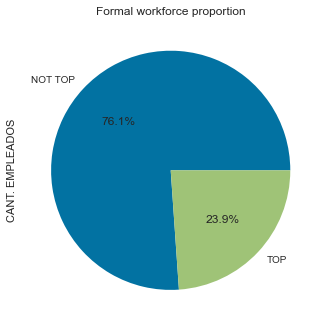

In [76]:
# Let's visualize
top_1000['TOP'] = "TOP"
rest['TOP'] = "NOT TOP"

frames = [top_1000, rest]
new_df = pd.concat(frames, sort=False)

#groupby the data by delivery type
my_pie = new_df.groupby("TOP")["CANT. EMPLEADOS"].sum()
my_pie.plot.pie(autopct="%.1f%%", title="Formal workforce proportion")



#### Analysis
This is the main reason why standardizing the companies might be too radical in this case. There is a disproportionate amount of hiring being done by the top 1000 companies (23.9%) in comparison to ALL other companies registered in this particular Dataset.

## Preliminary Conclusions On The Question

We can conclude that there's a very prevalent mistmatch in terms of "CANT. EMPLEADOS" regardless of region.

The difference in order of magnitude of the data is such that even when grouping by quartiles, the distribution is heavyly squewed. This would make a good argument for eliminating outliers, however, when we try to understand the overall role of companies in the workforce of a country those big-sized outliers are a key factor and not taking them into account might be a mistake.

If we were to ignore the bigger companies of the Dataset, we should standardize the values in order to have a more uniform body of data.

One thing is clear almost all companies in the Dataset are under 10 workers (82.72%) this is indifferent of region. A more fruitful inter-regional analysis might be to see the distribution of company sizes across regions (using the original size categories). We can even see how when viewing a box plox of all companies under 12 empoyees we get a much more measured graph.

Also another good analysis that might come from this question is to look for the impact of the big outliers when compared to the sheer mass of smaller companies (less than 10 workers). This could uncover how truly impactful this companies are in the Ecuadorian workforce and therefore suggest certain implications of employees that got to be hired by one of these ccompanies. But this is out of scope for this analysis.

# Relación geográfica entre companías y universidades

 Notebook: Pregunta 2:
La presencia de universidades en una provincia genera dinámica en la cantidad de empleados y la cantidad de empresas en esas localidades?

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [32]:
universidades = pd.read_csv('Data/universidades.csv', sep=';', encoding='latin')
universidades.head()

DENOMINACION FINANCIAMIENTO CATEGORIA  \
0                      ESCUELA POLITECNICA\nNACIONAL        PUBLICA         A   
1         ESCUELA SUPERIOR POLITECNICA DE CHIMBORAZO        PUBLICA         B   
2  ESCUELA SUPERIOR POLITECNICA AGROPECUARIA DE M...        PUBLICA         C   
3                    UNIVERSIDAD CENTRAL DEL ECUADOR        PUBLICA         B   
4                           UNIVERSIDAD DE GUAYAQUIL        PUBLICA         D   

                       NOMBRE AUTORIDAD  \
0       JAIME ALFONSO\nCALDERON SEGOVIA   
1                ROSA ELENA PINOS NEIRA   
2          QUINCHE LEONARDO FELIX LOPEZ   
3  FERNANDO EFRAIN SEMPERTEGUI ONTANEDA   
4        HECTOR ROBERTO CASSIS MARTINEZ   

                              TELEFONO INSTITUCIONAL  \
0                                  2507144 / 2508959   
1                                       03 2 998-200   
2  05-2 685-134/156 , ext.\n114, 115;  5-2685048/035   
3                                  2226080 /2521-590   
4                                04 2281559, 2296580   

                                  CORREO ELECTRONICO   PROVINCIA     CIUDAD  \
0                          correo.general@epn.edu.ec   PICHINCHA      QUITO   
1                            info@live.espoch.edu.ec  CHIMBORAZO   RIOBAMBA   
2                                 espam@espam.edu.ec      MANABI    CALCETA   
3  rectorado@ucee.edu.ec; fercempt@viociencias.ce...   PICHINCHA      QUITO   
4                                ugrector@uge.edu.ec      GUAYAS  GUAYAQUIL   

                                           DIRECCION  
0                       LADRON DE GUEVARA E-11-\n253  
1          PANAMERICANA SUR KM1 1/2 RIOBAMBA ECUADOR  
2                   10 DE AGOSTO 82 Y GRANDA CENTENO  
3  CIUDADELA UNIVERSITARIA, AV. AMERICA Y PEREZ G...  
4  CIUDADELA UNIVERSITARIA, SALVADOR ALLENDE Y MA...

In [33]:
universidades.shape

(59, 9)

In [34]:
empresas = pd.read_csv('Data/rankingCVSV.csv',sep=';', encoding='latin')
empresas.head()


/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2020 2019  EXPEDIENTE                                             NOMBRE  \
0   1.0    1       384.0                          CORPORACION FAVORITA C.A.   
1   2.0    4      6796.0                                 ECUACORRIENTE S.A.   
2   3.0    3     93144.0                               AURELIAN ECUADOR S.A   
3   4.0    2    705547.0                                 SHAYA ECUADOR S.A.   
4   5.0    5     47845.0  CONSORCIO ECUATORIANO DE TELECOMUNICACIONES S....   

  TIPO COMPAÑIA                                ACTIVIDAD ECONÓMICA   REGION  \
0       ANÓNIMA  G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...   SIERRA   
1       ANÓNIMA  B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...  ORIENTE   
2       ANÓNIMA  B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...  ORIENTE   
3       ANÓNIMA  B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...   SIERRA   
4       ANÓNIMA  J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...    COSTA   

                                           PROVINCIA  \
0  PICHINCHA                                     ...   
1  ZAMORA CHINCHIPE                              ...   
2  ZAMORA CHINCHIPE                              ...   
3  PICHINCHA                                     ...   
4  GUAYAS                                        ...   

                                              CIUDAD  TAMAÑO  \
0  QUITO                                         ...  GRANDE   
1  EL PANGUI                                     ...  GRANDE   
2  LOS ENCUENTROS                                ...  GRANDE   
3  QUITO                                         ...  GRANDE   
4  GUAYAQUIL                                     ...  GRANDE   

               SECTOR CANT. EMPLEADOS        ACTIVO2020  PATRIMONIO2020  \
0  MERCADO DE VALORES       10,768.00  2,121,860,458.59  1,482,973,135.   
1          SOCIETARIO          966.00  1,607,423,376.00   568,986,647.0   
2          SOCIETARIO        1,451.00  1,599,727,165.00   605,293,529.0   
3          SOCIETARIO           92.00  1,354,952,445.00   786,817,297.0   
4          SOCIETARIO        2,844.00  1,217,718,379.00   264,709,114.0   

  INGRESOS POR VENTA2020 UTILIDAD ANTES DE 2020 UTILIDAD DEL EJERCICIO2020  \
0         2,170,602,774.          187,168,402.3             220,198,120.31   
1                   0.00          -1,387,158.70                       0.00   
2          358,792,587.0          -49,399,080.0             -49,399,080.00   
3          669,076,072.0          179,317,070.0             210,961,259.00   
4         1,066,241,897.          174,644,376.0             204,823,940.00   

  UTILIDAD NETA2020 IR CAUSADO2020 INGRESO TOTAL2020  
0    147,499,234.25  41,971,212.00  2,170,602,774.93  
1     -2,633,855.70   1,246,697.02              0.00  
2    -49,399,080.00           0.00    358,823,965.00  
3    133,709,258.00  45,607,812.10    669,076,072.00  
4    106,826,750.00  67,817,626.00  1,071,561,214.00

#### Buscaremos la cantidad de empresas por provincia

In [35]:
df_empcan=empresas['PROVINCIA'].value_counts()
#df_empcan.drop(['nan'],axis=0)

In [36]:
# corregir informacion de las provincias
def clean_provincia(row):
    if(row == 'SANTO DOMINGO DE LOS '):
        return "SANTO DOMINGO DE LOS TSACHILAS"
    if(row == 'TSACHILAS                    '):
        return "SANTO DOMINGO DE LOS TSACHILAS"
    return str(row).rstrip()

empresas['PROVINCIA'] = empresas['PROVINCIA'].apply(clean_provincia)

#### Buscaremos la cantidad de empleados por provincia

In [37]:
empresas['EMPLEADOS'] = empresas['CANT. EMPLEADOS'].str.replace(',','')
empresas['EMPLEADOS'] = pd.to_numeric(empresas['EMPLEADOS'])
empresas['EMPLEADOS'].sum()

1433576.0

In [38]:
df_empem=empresas[["PROVINCIA", "EMPLEADOS",'NOMBRE']].groupby("PROVINCIA").sum()
#df_empem.drop(['nan'],axis=0)

#### Cantidad de universidaes por provincia

In [39]:
df_uni=universidades['PROVINCIA'].value_counts()

In [40]:
df_uni

PICHINCHA      16
GUAYAS         13
MANABI          5
AZUAY           4
IMBABURA        3
TUNGURAHUA      3
CHIMBORAZO      2
LOS RIOS        2
LOJA            2
BOLIVAR         1
NAPO            1
SANTA ELENA     1
PASTAZA         1
CAÑAR           1
EL ORO          1
CARCHI          1
COTOPAXI        1
ESMERALDAS      1
Name: PROVINCIA, dtype: int64

#### Merge entre los dos dataframes para tener la cantidad de

In [41]:
df1 = pd.DataFrame(df_empcan)
df1.rename(columns={'PROVINCIA':'CANT EMPRESAS'},inplace=True)
#df1.drop(['nan'],axis=0)

In [42]:
df2 = pd.DataFrame(df_uni)
df2.rename(columns={'PROVINCIA':'UNIVERSIDADES'},inplace=True)
df2

UNIVERSIDADES
PICHINCHA               16
GUAYAS                  13
MANABI                   5
AZUAY                    4
IMBABURA                 3
TUNGURAHUA               3
CHIMBORAZO               2
LOS RIOS                 2
LOJA                     2
BOLIVAR                  1
NAPO                     1
SANTA ELENA              1
PASTAZA                  1
CAÑAR                    1
EL ORO                   1
CARCHI                   1
COTOPAXI                 1
ESMERALDAS               1

In [43]:
df1=df1.merge(df_empem,left_index=True, right_index=True)
#df1.drop(['nan'],axis=0)

In [44]:
df1 = df1.rename_axis('PROVINCIA').reset_index()

In [45]:
df1

Empty DataFrame
Columns: [PROVINCIA, CANT EMPRESAS, EMPLEADOS]
Index: []

In [ ]:
df2 = df2.rename_axis('PROVINCIA').reset_index()

In [ ]:
df2

PROVINCIA  UNIVERSIDADES
0     PICHINCHA             16
1        GUAYAS             13
2        MANABI              5
3         AZUAY              4
4      IMBABURA              3
5    TUNGURAHUA              3
6    CHIMBORAZO              2
7      LOS RIOS              2
8          LOJA              2
9       BOLIVAR              1
10         NAPO              1
11  SANTA ELENA              1
12      PASTAZA              1
13        CAÑAR              1
14       EL ORO              1
15       CARCHI              1
16     COTOPAXI              1
17   ESMERALDAS              1

In [ ]:
df = pd.merge(df1,df2,how='outer')


In [ ]:
df.fillna({'UNIVERSIDADES': 0}, inplace=True)
df

CANT EMPRESAS  EMPLEADOS    PROVINCIA  UNIVERSIDADES
0             NaN        NaN    PICHINCHA             16
1             NaN        NaN       GUAYAS             13
2             NaN        NaN       MANABI              5
3             NaN        NaN        AZUAY              4
4             NaN        NaN     IMBABURA              3
5             NaN        NaN   TUNGURAHUA              3
6             NaN        NaN   CHIMBORAZO              2
7             NaN        NaN     LOS RIOS              2
8             NaN        NaN         LOJA              2
9             NaN        NaN      BOLIVAR              1
10            NaN        NaN         NAPO              1
11            NaN        NaN  SANTA ELENA              1
12            NaN        NaN      PASTAZA              1
13            NaN        NaN        CAÑAR              1
14            NaN        NaN       EL ORO              1
15            NaN        NaN       CARCHI              1
16            NaN        NaN     COTOPAXI              1
17            NaN        NaN   ESMERALDAS              1

In [ ]:
df = df.convert_dtypes()
df.dtypes

CANT EMPRESAS     Int64
EMPLEADOS         Int64
PROVINCIA        string
UNIVERSIDADES     Int64
dtype: object

In [ ]:
df = df.drop(3)

In [ ]:
df

CANT EMPRESAS  EMPLEADOS    PROVINCIA  UNIVERSIDADES
0            <NA>       <NA>    PICHINCHA             16
1            <NA>       <NA>       GUAYAS             13
2            <NA>       <NA>       MANABI              5
4            <NA>       <NA>     IMBABURA              3
5            <NA>       <NA>   TUNGURAHUA              3
6            <NA>       <NA>   CHIMBORAZO              2
7            <NA>       <NA>     LOS RIOS              2
8            <NA>       <NA>         LOJA              2
9            <NA>       <NA>      BOLIVAR              1
10           <NA>       <NA>         NAPO              1
11           <NA>       <NA>  SANTA ELENA              1
12           <NA>       <NA>      PASTAZA              1
13           <NA>       <NA>        CAÑAR              1
14           <NA>       <NA>       EL ORO              1
15           <NA>       <NA>       CARCHI              1
16           <NA>       <NA>     COTOPAXI              1
17           <NA>       <NA>   ESMERALDAS              1

In [ ]:
import seaborn as sns

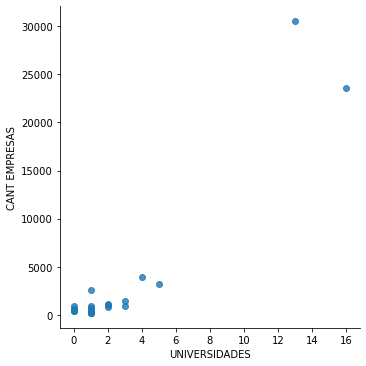

In [166]:
sns.lmplot('UNIVERSIDADES', 'CANT EMPRESAS', data=df, fit_reg=False)

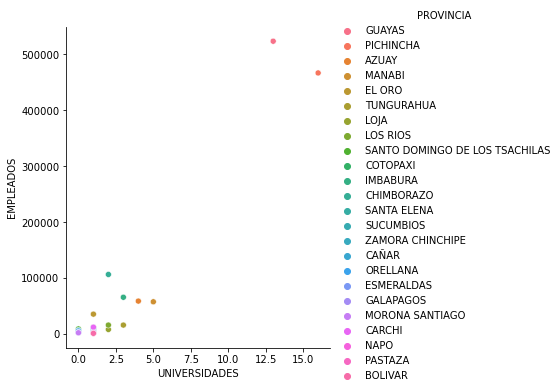

In [186]:
sns.relplot(x="UNIVERSIDADES", y="EMPLEADOS", hue="PROVINCIA", data=df);

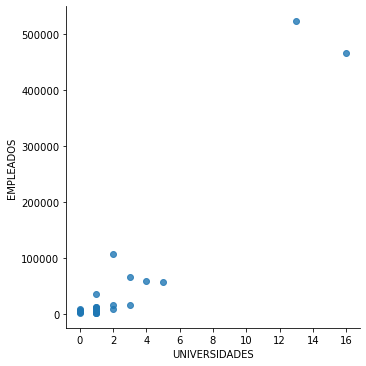

In [188]:
sns.lmplot('UNIVERSIDADES', 'EMPLEADOS', data=df, fit_reg=False)

In [175]:
df3 = df.loc[df["UNIVERSIDADES"] < 10]

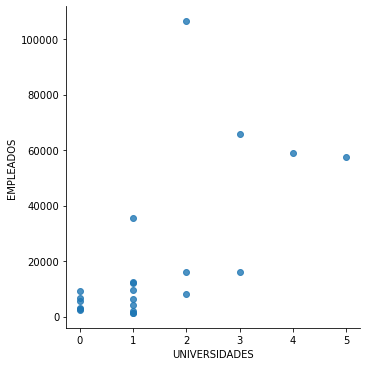

In [177]:
sns.lmplot('UNIVERSIDADES', 'EMPLEADOS', data=df3, fit_reg=False)

C:\Users\danny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


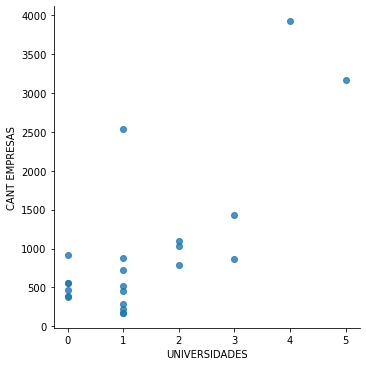

In [182]:
sns.lmplot('UNIVERSIDADES', 'CANT EMPRESAS', data=df3, fit_reg=False)

<AxesSubplot:xlabel='UNIVERSIDADES', ylabel='EMPLEADOS'>

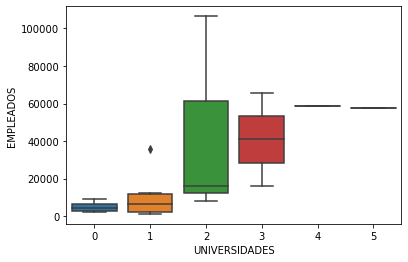

In [178]:
sns.boxplot(x="UNIVERSIDADES", y="EMPLEADOS", data=df3)

In [179]:
df4 = df.loc[df["UNIVERSIDADES"] > 10]

C:\Users\danny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


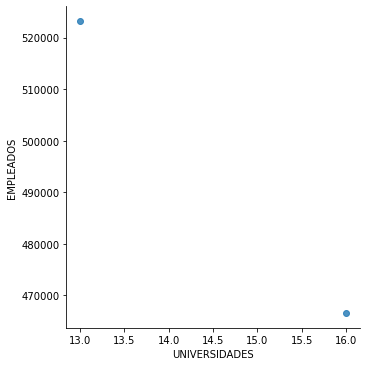

In [180]:
sns.lmplot('UNIVERSIDADES', 'EMPLEADOS', data=df4, fit_reg=False)

<AxesSubplot:xlabel='UNIVERSIDADES', ylabel='EMPLEADOS'>

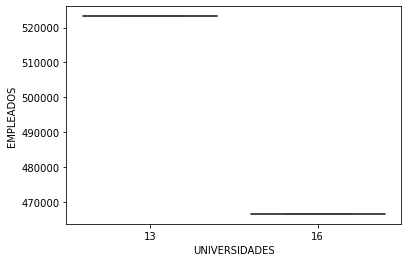

In [181]:
sns.boxplot(x="UNIVERSIDADES", y="EMPLEADOS", data=df4)

# Análisis (TF-IDF) de skills por industria

## Introducción

En esta sección utilizamos una técnica de NLP (Natural Language Processing) con el fin de identificar qué habilidades son características y qué habilidades son transversales de acuerdo a la industria en base a lo que hemos recopilado de LinkedIn. En este caso se trata de Term Frequency - Inverse Document Frecuency (TF-IDF).

TF-IDF consiste en ver qué tan frecuentemente ocurre un término en un documento (TF) y al mismo tiempo contraponerlo a si ha sido usado en otros documentos también (IDF).

Mientras más ocurra un término en un documento y menos se lo pueda encontrar en otros documentos mayor será su valor de TF-IDF. Importante recalcar, si un término se encuentra en todos los documentos, su TF-IDF será 0, ya que este término no es nada característico para un documento en específico (es completamente transversal).

La única diferencia en nuestro acercamiento a la técnica es que nosotros mapeamos términos a habilidades (skills) y documentos a industrias, no obstante, el problema es el mismo a resolver. Queremos saber qué habilidades son características de una industria y cuales son habilidades transversales (aparecen de manera nominal a travez de todas las industrias).

## Setup

In [1]:
# Imports
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from math import log

In [2]:
# Funciones auxiliares

# Esta función nos ayuda a hacer un merge a skills que nos parecen muy similares en caso de necesitarlo
def merge_cols(array_cols, col_name, df):
    df[col_name] = 0
    for col_label in array_cols:
        df[col_name] = df[col_name] + df[col_label]
        del df[col_label]
        

# Esta función nos ayuda a hacer un merge a industrias que nos parecen muy similares en caso de necesitarlo
def merge_industries(array_industries, industry_name, df):
    df_interno = df.T.copy()
    df_interno[industry_name] = 0
    for industry in array_industries:
        df_interno[industry_name] = df_interno[industry_name] + df_interno[industry]
        del df_interno[industry]
    df_interno = df_interno.T 
    return df_interno

In [3]:
# Leemos el csv
df = pd.read_csv('Data/empresacategoriaAll.csv', index_col=False)
df.head(4)

NOMBRE  \
0                          CORPORACION FAVORITA C.A.   
1                                      ECUACORRIENTE   
2                                   AURELIAN ECUADOR   
3  CONSORCIO ECUATORIANO DE TELECOMUNICACIONES   ...   

                                            overview  \
0  Corporación Favorita C.A. es una empresa ecuat...   
1  EcuaCorriente S.A. es una empresa ecuatoriana ...   
2  Lundin Gold Inc., headquartered in Vancouver, ...   
3  PORTA está operando desde 1993, es la empresa ...   

                                website            industry  \
0   http://www.corporacionfavorita.com/        Supermarkets   
1          http://www.corriente.com.ec/     Mining & Metals   
2  http://www.lundingold.com/s/home.asp     Mining & Metals   
3                 http://www.porta.net/  Telecommunications   

            company_size       headquarters      type_of_company  founded  \
0      10,001+ employees   Quito, Pichincha       Privately Held   1952.0   
1    501-1,000 employees                NaN        Self-Employed   1999.0   
2  1,001-5,000 employees                NaN  Sole Proprietorship   2015.0   
3  1,001-5,000 employees  Guayaquil, Guayas       Privately Held   1993.0   

  specialties  Customer Service  ...  Financial Risk  Brazilian Portuguese  \
0         NaN             195.0  ...             0.0                   0.0   
1         NaN              17.0  ...             0.0                   0.0   
2     Minería              91.0  ...             0.0                   0.0   
3         NaN             155.0  ...             0.0                   0.0   

   University Teaching  Investment Advisory  Corporate Governance  Databases  \
0                  0.0                  0.0                   0.0        0.0   
1                  0.0                  0.0                   0.0        0.0   
2                  0.0                  0.0                   0.0        0.0   
3                  0.0                  0.0                   0.0        0.0   

   Mathematics  Board of Directors  Credit  Content Management Systems (CMS)  
0          0.0                 0.0     0.0                               0.0  
1          0.0                 0.0     0.0                               0.0  
2          0.0                 0.0     0.0                               0.0  
3          0.0                 0.0     0.0                               0.0  

[4 rows x 414 columns]

## Preparación de datos

In [4]:
# Removemos columnas innecesarias para nuestro análisis
df = df.iloc[:, 3:]
df.drop(['company_size','headquarters', 'type_of_company', 'founded', 'specialties', 'Clerical Skills', 'Army', 'Command'], axis=1, inplace=True)
df

industry  Customer Service  Microsoft Office  Microsoft Excel  \
0          Supermarkets             195.0             143.0            141.0   
1       Mining & Metals              17.0              49.0             42.0   
2       Mining & Metals              91.0             258.0            198.0   
3    Telecommunications             155.0             128.0            100.0   
4     Airlines/Aviation              26.0              38.0             27.0   
..                  ...               ...               ...              ...   
404             Banking              30.0              22.0             18.0   
405             Banking              48.0              47.0             40.0   
406  Financial Services               3.0               4.0              5.0   
407  Financial Services              22.0              20.0             15.0   
408  Financial Services             140.0             116.0             94.0   

     Teamwork  Microsoft Word  Leadership  Strategic Planning  English  \
0       113.0            84.0        81.0                71.0     67.0   
1        18.0            23.0         0.0                38.0     19.0   
2         0.0           105.0         0.0               148.0    138.0   
3        52.0            52.0        63.0                95.0     47.0   
4        14.0            20.0         0.0                28.0     23.0   
..        ...             ...         ...                 ...      ...   
404      15.0            12.0         0.0                16.0     12.0   
405      24.0             0.0        23.0                37.0     18.0   
406       0.0             4.0         0.0                 0.0      0.0   
407       8.0            13.0         0.0                 0.0     10.0   
408      57.0            62.0        54.0                74.0     52.0   

     Project Management  ...  Financial Risk  Brazilian Portuguese  \
0                  65.0  ...             0.0                   0.0   
1                  37.0  ...             0.0                   0.0   
2                 190.0  ...             0.0                   0.0   
3                 112.0  ...             0.0                   0.0   
4                  18.0  ...             0.0                   0.0   
..                  ...  ...             ...                   ...   
404                12.0  ...             0.0                   0.0   
405                31.0  ...             0.0                   0.0   
406                 2.0  ...             0.0                   0.0   
407                10.0  ...             0.0                   0.0   
408                64.0  ...             0.0                   0.0   

     University Teaching  Investment Advisory  Corporate Governance  \
0                    0.0                  0.0                   0.0   
1                    0.0                  0.0                   0.0   
2                    0.0                  0.0                   0.0   
3                    0.0                  0.0                   0.0   
4                    0.0                  0.0                   0.0   
..                   ...                  ...                   ...   
404                  0.0                  0.0                   0.0   
405                  0.0                  0.0                   0.0   
406                  0.0                  0.0                   0.0   
407                  0.0                  0.0                   0.0   
408                  0.0                  0.0                   0.0   

     Databases  Mathematics  Board of Directors  Credit  \
0          0.0          0.0                 0.0     0.0   
1          0.0          0.0                 0.0     0.0   
2          0.0          0.0                 0.0     0.0   
3          0.0          0.0                 0.0     0.0   
4          0.0          0.0                 0.0     0.0   
..         ...          ...                 ...     ...   
404        0.0          0.0                 0.0    10.0   

En la siguiente celda, como queremos agrupar compañías que compartan industria vamos a estandarizar nuestros datos con el fin de utilizar una proporción de empleados en lugar de valores absolutos. Esto porque la cantidad de empleados varía radicalmente entre compañías y nos interesa preservar proporciones más que valores puntuales. 

In [5]:
# Normalización de número de empleados que posean una habilidad por compañía.
def norm(s):
    return s[1:]/s[1:].sum()

df_norm = df.copy()
df_norm.iloc[:, 1:] =df_norm.apply(norm,axis=1)
df_norm

industry  Customer Service  Microsoft Office  Microsoft Excel  \
0          Supermarkets          0.151869          0.111371         0.109813   
1       Mining & Metals          0.044737          0.128947         0.110526   
2       Mining & Metals          0.046146          0.130832         0.100406   
3    Telecommunications          0.117424          0.096970         0.075758   
4     Airlines/Aviation          0.077612          0.113433         0.080597   
..                  ...               ...               ...              ...   
404             Banking          0.125523          0.092050         0.075314   
405             Banking          0.108352          0.106095         0.090293   
406  Financial Services          0.085714          0.114286         0.142857   
407  Financial Services          0.134969          0.122699         0.092025   
408  Financial Services          0.135528          0.112294         0.090997   

     Teamwork  Microsoft Word  Leadership  Strategic Planning   English  \
0    0.088006        0.065421    0.063084            0.055296  0.052181   
1    0.047368        0.060526    0.000000            0.100000  0.050000   
2    0.000000        0.053245    0.000000            0.075051  0.069980   
3    0.039394        0.039394    0.047727            0.071970  0.035606   
4    0.041791        0.059701    0.000000            0.083582  0.068657   
..        ...             ...         ...                 ...       ...   
404  0.062762        0.050209    0.000000            0.066946  0.050209   
405  0.054176        0.000000    0.051919            0.083521  0.040632   
406  0.000000        0.114286    0.000000            0.000000  0.000000   
407  0.049080        0.079755    0.000000            0.000000  0.061350   
408  0.055179        0.060019    0.052275            0.071636  0.050339   

     Project Management  ...  Financial Risk  Brazilian Portuguese  \
0              0.050623  ...             0.0                   0.0   
1              0.097368  ...             0.0                   0.0   
2              0.096349  ...             0.0                   0.0   
3              0.084848  ...             0.0                   0.0   
4              0.053731  ...             0.0                   0.0   
..                  ...  ...             ...                   ...   
404            0.050209  ...             0.0                   0.0   
405            0.069977  ...             0.0                   0.0   
406            0.057143  ...             0.0                   0.0   
407            0.061350  ...             0.0                   0.0   
408            0.061955  ...             0.0                   0.0   

     University Teaching  Investment Advisory  Corporate Governance  \
0                    0.0                  0.0                   0.0   
1                    0.0                  0.0                   0.0   
2                    0.0                  0.0                   0.0   
3                    0.0                  0.0                   0.0   
4                    0.0                  0.0                   0.0   
..                   ...                  ...                   ...   
404                  0.0                  0.0                   0.0   
405                  0.0                  0.0                   0.0   
406                  0.0                  0.0                   0.0   
407                  0.0                  0.0                   0.0   
408                  0.0                  0.0                   0.0   

     Databases  Mathematics  Board of Directors    Credit  \
0          0.0          0.0                 0.0  0.000000   
1          0.0          0.0                 0.0  0.000000   
2          0.0          0.0                 0.0  0.000000   
3          0.0          0.0                 0.0  0.000000   
4          0.0          0.0                 0.0  0.000000   
..         ...          ...                 ...       ...   
404        0.0          0.0     

In [6]:
# Agrupamos por industria
df_industry = df_norm.groupby('industry').sum()
df_industry

Customer Service  Microsoft Office  \
industry                                                               
Accounting                                0.062500          0.156250   
Airlines/Aviation                         0.273531          0.306192   
Alternative Medicine                      0.102041          0.088435   
Apparel & Fashion                         0.187739          0.246009   
Architecture & Planning                   0.066667          0.100000   
...                                            ...               ...   
Textiles                                  0.131749          0.118790   
Utilities                                 0.129630          0.074074   
Venture Capital & Private Equity          0.068376          0.119658   
Veterinary                                0.115942          0.101449   
Wholesale                                 1.984414          2.037465   

                                  Microsoft Excel  Teamwork  Microsoft Word  \
industry                                                                      
Accounting                               0.062500  0.000000        0.000000   
Airlines/Aviation                        0.391693  0.237949        0.241663   
Alternative Medicine                     0.108844  0.047619        0.054422   
Apparel & Fashion                        0.215996  0.121648        0.154374   
Architecture & Planning                  0.100000  0.000000        0.066667   
...                                           ...       ...             ...   
Textiles                                 0.105832  0.000000        0.047516   
Utilities                                0.092593  0.111111        0.055556   
Venture Capital & Private Equity         0.160684  0.000000        0.051282   
Veterinary                               0.072464  0.000000        0.057971   
Wholesale                                2.144024  0.835807        1.226546   

                                  Leadership  Strategic Planning   English  \
industry                                                                     
Accounting                          0.062500            0.093750  0.000000   
Airlines/Aviation                   0.000000            0.273640  0.324313   
Alternative Medicine                0.040816            0.088435  0.054422   
Apparel & Fashion                   0.121488            0.164432  0.094349   
Architecture & Planning             0.000000            0.050000  0.066667   
...                                      ...                 ...       ...   
Textiles                            0.047516            0.086393  0.000000   
Utilities                           0.055556            0.000000  0.000000   
Venture Capital & Private Equity    0.066667            0.152137  0.068376   
Veterinary                          0.000000            0.115942  0.057971   
Wholesale                           0.824960            1.568785  0.659656   

                                  Project Management     Sales  ...  \
industry                                                        ...   
Accounting                                  0.062500  0.062500  ...   
Airlines/Aviation                           0.139753  0.000000  ...   
Alternative Medicine                        0.081633  0.000000  ...   
Apparel & Fashion                           0.044540  0.111750  ...   
Architecture & Planning                     0.050000  0.000000  ...   
...                                              ...       ...  ...   
Textiles                                    0.056156  0.043197  ...   
Utilities                                   0.000000  0.055556  ...   
Venture Capital & Private Equity            0.066667  0.000000  ...   
Veterinary                                  0.000000  0.000000  ...   
Wholesale                                   1.173793  1.112454  ...   

                                  Financial Risk  Brazilian Portuguese  \
industry                                                

In [7]:
# Juntamos las habilidades que se traslapan mucho o que son redundantes
df_industry = merge_industries(['Computer Hardware', 'Information Technology & Services', 'Telecommunications'], 'IT & Telecom Services', df_industry)
df_industry = merge_industries(['Computer Software','Internet', 'Program Development'], 'Software Development', df_industry)
df_industry = merge_industries(['Consumer Electronics', 'Consumer Goods', 'Packaging & Containers'], 'Consumer Product Goods', df_industry)
df_industry = merge_industries(['Environmental Services', 'Renewables & Environment'], 'Environmental', df_industry)
df_industry = merge_industries(['Medical Device', 'Hospital & Health Care'], 'Healthcare', df_industry)
df_industry = merge_industries(['Financial Services', 'Venture Capital & Private Equity', 'Banking', 'Capital Markets', 'Investment Banking'], 'Finance & Banking Sector', df_industry)
df_industry

Customer Service  Microsoft Office  Microsoft Excel  \
industry                                                                        
Accounting                        0.062500          0.156250         0.062500   
Airlines/Aviation                 0.273531          0.306192         0.391693   
Alternative Medicine              0.102041          0.088435         0.108844   
Apparel & Fashion                 0.187739          0.246009         0.215996   
Architecture & Planning           0.066667          0.100000         0.100000   
...                                    ...               ...              ...   
Software Development              0.250000          0.177632         0.215132   
Consumer Product Goods            0.908516          1.337915         1.251235   
Environmental                     0.475892          0.770723         0.651474   
Healthcare                        0.411874          0.432502         0.461168   
Finance & Banking Sector          4.047114          4.336093         3.758285   

                          Teamwork  Microsoft Word  Leadership  \
industry                                                         
Accounting                0.000000        0.000000    0.062500   
Airlines/Aviation         0.237949        0.241663    0.000000   
Alternative Medicine      0.047619        0.054422    0.040816   
Apparel & Fashion         0.121648        0.154374    0.121488   
Architecture & Planning   0.000000        0.066667    0.000000   
...                            ...             ...         ...   
Software Development      0.050000        0.075000    0.115132   
Consumer Product Goods    0.559116        0.501674    0.571572   
Environmental             0.123953        0.450643    0.385949   
Healthcare                0.101248        0.279060    0.330661   
Finance & Banking Sector  1.729512        2.055704    1.425205   

                          Strategic Planning   English  Project Management  \
industry                                                                     
Accounting                          0.093750  0.000000            0.062500   
Airlines/Aviation                   0.273640  0.324313            0.139753   
Alternative Medicine                0.088435  0.054422            0.081633   
Apparel & Fashion                   0.164432  0.094349            0.044540   
Architecture & Planning             0.050000  0.066667            0.050000   
...                                      ...       ...                 ...   
Software Development                0.242220  0.102632            0.319143   
Consumer Product Goods              0.995016  0.481548            0.796902   
Environmental                       0.497924  0.207565            0.370857   
Healthcare                          0.310668  0.246036            0.187262   
Finance & Banking Sector            3.139420  1.460979            3.011241   

                             Sales  ...  Financial Risk  Brazilian Portuguese  \
industry                            ...                                         
Accounting                0.062500  ...        0.000000              0.000000   
Airlines/Aviation         0.000000  ...        0.000000              0.000000   
Alternative Medicine      0.000000  ...        0.000000              0.000000   
Apparel & Fashion         0.111750  ...        0.000000              0.000000   
Architecture & Planning   0.000000  ...        0.000000              0.000000   
...                            ...  ...             ...                   ...   
Software Development      0.075000  ...        0.000000              0.000000   
Consumer Product Goods    0.422096  ...        0.000000              0.000000   
Environmental             0.000000  ...        0.000000              0.000000   
Healthcare                0.157094  ...        0.000000              0.000000   
Finance & Banking Sector  0.605314  ...        0.035714              0.035714   

                          University Teachin

In [8]:
# Realizamos una copia de nuestro df para trabajar sobre ella
df_doc = df_industry.copy()
df_doc.astype('float64')

Customer Service  Microsoft Office  Microsoft Excel  \
industry                                                                        
Accounting                        0.062500          0.156250         0.062500   
Airlines/Aviation                 0.273531          0.306192         0.391693   
Alternative Medicine              0.102041          0.088435         0.108844   
Apparel & Fashion                 0.187739          0.246009         0.215996   
Architecture & Planning           0.066667          0.100000         0.100000   
...                                    ...               ...              ...   
Software Development              0.250000          0.177632         0.215132   
Consumer Product Goods            0.908516          1.337915         1.251235   
Environmental                     0.475892          0.770723         0.651474   
Healthcare                        0.411874          0.432502         0.461168   
Finance & Banking Sector          4.047114          4.336093         3.758285   

                          Teamwork  Microsoft Word  Leadership  \
industry                                                         
Accounting                0.000000        0.000000    0.062500   
Airlines/Aviation         0.237949        0.241663    0.000000   
Alternative Medicine      0.047619        0.054422    0.040816   
Apparel & Fashion         0.121648        0.154374    0.121488   
Architecture & Planning   0.000000        0.066667    0.000000   
...                            ...             ...         ...   
Software Development      0.050000        0.075000    0.115132   
Consumer Product Goods    0.559116        0.501674    0.571572   
Environmental             0.123953        0.450643    0.385949   
Healthcare                0.101248        0.279060    0.330661   
Finance & Banking Sector  1.729512        2.055704    1.425205   

                          Strategic Planning   English  Project Management  \
industry                                                                     
Accounting                          0.093750  0.000000            0.062500   
Airlines/Aviation                   0.273640  0.324313            0.139753   
Alternative Medicine                0.088435  0.054422            0.081633   
Apparel & Fashion                   0.164432  0.094349            0.044540   
Architecture & Planning             0.050000  0.066667            0.050000   
...                                      ...       ...                 ...   
Software Development                0.242220  0.102632            0.319143   
Consumer Product Goods              0.995016  0.481548            0.796902   
Environmental                       0.497924  0.207565            0.370857   
Healthcare                          0.310668  0.246036            0.187262   
Finance & Banking Sector            3.139420  1.460979            3.011241   

                             Sales  ...  Financial Risk  Brazilian Portuguese  \
industry                            ...                                         
Accounting                0.062500  ...        0.000000              0.000000   
Airlines/Aviation         0.000000  ...        0.000000              0.000000   
Alternative Medicine      0.000000  ...        0.000000              0.000000   
Apparel & Fashion         0.111750  ...        0.000000              0.000000   
Architecture & Planning   0.000000  ...        0.000000              0.000000   
...                            ...  ...             ...                   ...   
Software Development      0.075000  ...        0.000000              0.000000   
Consumer Product Goods    0.422096  ...        0.000000              0.000000   
Environmental             0.000000  ...        0.000000              0.000000   
Healthcare                0.157094  ...        0.000000              0.000000   
Finance & Banking Sector  0.605314  ...        0.035714              0.035714   

                          University Teachin

In [9]:
# En caso de que alguna habilidad se haya quedado sin industria vamos a descartarla
df_doc = df_doc.loc[:, (df_doc != 0).any(axis=0)]
df_doc.shape # dimensiones finales

(61, 381)

## TF-IDF

In [10]:
# De nuestro df_doc obtenemos nuestra matriz TF; Posibles fórmulas: max, sum (usamos esta), 1 + log(freq)
def applytf(s):
    return s/s.sum()

dftf=df_doc.apply(applytf,axis=1)
dftf

Customer Service  Microsoft Office  Microsoft Excel  \
industry                                                                        
Accounting                        0.062500          0.156250         0.062500   
Airlines/Aviation                 0.068383          0.076548         0.097923   
Alternative Medicine              0.102041          0.088435         0.108844   
Apparel & Fashion                 0.093870          0.123004         0.107998   
Architecture & Planning           0.066667          0.100000         0.100000   
...                                    ...               ...              ...   
Software Development              0.050000          0.035526         0.043026   
Consumer Product Goods            0.075710          0.111493         0.104270   
Environmental                     0.067985          0.110103         0.093068   
Healthcare                        0.082375          0.086500         0.092234   
Finance & Banking Sector          0.096360          0.103240         0.089483   

                          Teamwork  Microsoft Word  Leadership  \
industry                                                         
Accounting                0.000000        0.000000    0.062500   
Airlines/Aviation         0.059487        0.060416    0.000000   
Alternative Medicine      0.047619        0.054422    0.040816   
Apparel & Fashion         0.060824        0.077187    0.060744   
Architecture & Planning   0.000000        0.066667    0.000000   
...                            ...             ...         ...   
Software Development      0.010000        0.015000    0.023026   
Consumer Product Goods    0.046593        0.041806    0.047631   
Environmental             0.017708        0.064378    0.055136   
Healthcare                0.020250        0.055812    0.066132   
Finance & Banking Sector  0.041179        0.048945    0.033933   

                          Strategic Planning   English  Project Management  \
industry                                                                     
Accounting                          0.093750  0.000000            0.062500   
Airlines/Aviation                   0.068410  0.081078            0.034938   
Alternative Medicine                0.088435  0.054422            0.081633   
Apparel & Fashion                   0.082216  0.047174            0.022270   
Architecture & Planning             0.050000  0.066667            0.050000   
...                                      ...       ...                 ...   
Software Development                0.048444  0.020526            0.063829   
Consumer Product Goods              0.082918  0.040129            0.066408   
Environmental                       0.071132  0.029652            0.052980   
Healthcare                          0.062134  0.049207            0.037452   
Finance & Banking Sector            0.074748  0.034785            0.071696   

                             Sales  ...  Financial Risk  Brazilian Portuguese  \
industry                            ...                                         
Accounting                0.062500  ...         0.00000               0.00000   
Airlines/Aviation         0.000000  ...         0.00000               0.00000   
Alternative Medicine      0.000000  ...         0.00000               0.00000   
Apparel & Fashion         0.055875  ...         0.00000               0.00000   
Architecture & Planning   0.000000  ...         0.00000               0.00000   
...                            ...  ...             ...                   ...   
Software Development      0.015000  ...         0.00000               0.00000   
Consumer Product Goods    0.035175  ...         0.00000               0.00000   
Environmental             0.000000  ...         0.00000               0.00000   
Healthcare                0.031419  ...         0.00000               0.00000   
Finance & Banking Sector  0.014412  ...         0.00085               0.00085   

                          University Teachin

In [11]:
# De nuestra matriz df_doc obtenemos nuestra matriz IDF 
def applyidf(s):    
    d = len(s)
    n = (s > 0).values.sum()
    return log(d/(n)) 

dfidf = df_doc.apply(applyidf,axis=0)
dfidf = pd.DataFrame(dfidf)
dfidf = dfidf.transpose()
dfidf

Customer Service  Microsoft Office  Microsoft Excel  Teamwork  \
0          0.085522          0.050431         0.033336  0.260726   

   Microsoft Word  Leadership  Strategic Planning   English  \
0        0.103541    0.239673            0.067823  0.179048   

   Project Management     Sales  ...  Financial Risk  Brazilian Portuguese  \
0             0.12189  0.326684  ...        4.110874              4.110874   

   University Teaching  Investment Advisory  Corporate Governance  Databases  \
0             4.110874             4.110874              4.110874   4.110874   

   Mathematics  Board of Directors    Credit  Content Management Systems (CMS)  
0     4.110874            4.110874  4.110874                          4.110874  

[1 rows x 381 columns]

In [12]:
# Corroboramos que TF mantenga las dimensiones originales (df_doc) y que IDF sea una sola fila con el mismo número de columnas
dftf.info() # 61x381
dfidf.info() # 1x381

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, Accounting to Finance & Banking Sector
Columns: 381 entries, Customer Service to Content Management Systems (CMS)
dtypes: float64(381)
memory usage: 182.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 381 entries, Customer Service to Content Management Systems (CMS)
dtypes: float64(381)
memory usage: 3.1 KB


In [13]:
# Obtenemos la matriz TF-IDF de realizar multiplicacíon entre las matrices
df_final= dftf * dfidf.values
df_final

Customer Service  Microsoft Office  Microsoft Excel  \
industry                                                                        
Accounting                        0.005345          0.007880         0.002084   
Airlines/Aviation                 0.005848          0.003860         0.003264   
Alternative Medicine              0.008727          0.004460         0.003628   
Apparel & Fashion                 0.008028          0.006203         0.003600   
Architecture & Planning           0.005701          0.005043         0.003334   
...                                    ...               ...              ...   
Software Development              0.004276          0.001792         0.001434   
Consumer Product Goods            0.006475          0.005623         0.003476   
Environmental                     0.005814          0.005553         0.003103   
Healthcare                        0.007045          0.004362         0.003075   
Finance & Banking Sector          0.008241          0.005206         0.002983   

                          Teamwork  Microsoft Word  Leadership  \
industry                                                         
Accounting                0.000000        0.000000    0.014980   
Airlines/Aviation         0.015510        0.006255    0.000000   
Alternative Medicine      0.012416        0.005635    0.009783   
Apparel & Fashion         0.015858        0.007992    0.014559   
Architecture & Planning   0.000000        0.006903    0.000000   
...                            ...             ...         ...   
Software Development      0.002607        0.001553    0.005519   
Consumer Product Goods    0.012148        0.004329    0.011416   
Environmental             0.004617        0.006666    0.013215   
Healthcare                0.005280        0.005779    0.015850   
Finance & Banking Sector  0.010736        0.005068    0.008133   

                          Strategic Planning   English  Project Management  \
industry                                                                     
Accounting                          0.006358  0.000000            0.007618   
Airlines/Aviation                   0.004640  0.014517            0.004259   
Alternative Medicine                0.005998  0.009744            0.009950   
Apparel & Fashion                   0.005576  0.008446            0.002715   
Architecture & Planning             0.003391  0.011937            0.006094   
...                                      ...       ...                 ...   
Software Development                0.003286  0.003675            0.007780   
Consumer Product Goods              0.005624  0.007185            0.008095   
Environmental                       0.004824  0.005309            0.006458   
Healthcare                          0.004214  0.008810            0.004565   
Finance & Banking Sector            0.005070  0.006228            0.008739   

                             Sales  ...  Financial Risk  Brazilian Portuguese  \
industry                            ...                                         
Accounting                0.020418  ...        0.000000              0.000000   
Airlines/Aviation         0.000000  ...        0.000000              0.000000   
Alternative Medicine      0.000000  ...        0.000000              0.000000   
Apparel & Fashion         0.018253  ...        0.000000              0.000000   
Architecture & Planning   0.000000  ...        0.000000              0.000000   
...                            ...  ...             ...                   ...   
Software Development      0.004900  ...        0.000000              0.000000   
Consumer Product Goods    0.011491  ...        0.000000              0.000000   
Environmental             0.000000  ...        0.000000              0.000000   
Healthcare                0.010264  ...        0.000000              0.000000   
Finance & Banking Sector  0.004708  ...        0.003496              0.003496   

                          University Teachin

Text(51.99999999999999, 0.5, 'Industria')

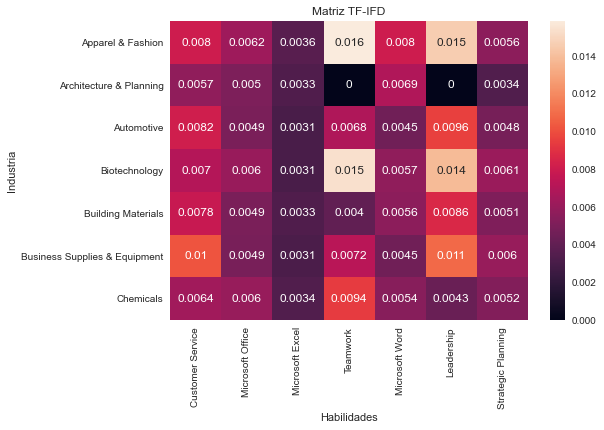

In [14]:
# TF-IDF Heatmap (Reducido)
dataplot = sns.heatmap(df_final.iloc[3:10,:7], annot=True)
plt.title("Matriz TF-IFD") 
plt.xlabel('Habilidades')
plt.ylabel('Industria')

In [15]:
# Lista de las 20 habilidades más transversales
dfidf.squeeze().sort_values(ascending=True).head(20)

Microsoft Excel         0.033336
Microsoft Office        0.050431
Strategic Planning      0.067823
Customer Service        0.085522
Microsoft Word          0.103541
Team Leadership         0.103541
Negotiation             0.121890
Project Management      0.121890
English                 0.179048
Business Strategy       0.198851
Microsoft PowerPoint    0.219054
Management              0.219054
Leadership              0.239673
Teamwork                0.260726
Sales                   0.326684
Business Management     0.527355
Research                0.852777
Marketing               0.852777
Analytical Skills       0.852777
Communication           1.019831
Name: 0, dtype: float64

In [16]:
# Perfiles por TF (los skills mas reiterados por industria, indiferentemente de su transversalidad)
def check_TFprofiles(row):
    serie = row.iloc[1:].sort_values(ascending=False).head(10) 
    #serie = serie[serie>0.00]
    if(serie.size > 0): 
        print("========== " + row.industry + " ==========")
        print(serie)

#df_doc.reset_index().apply(check_TFprofiles , axis=1)
#dftf.reset_index().apply(check_TFprofiles , axis=1)

In [17]:
# Arreglo de industrias principales (industrias de interés para el estudio)
main_industries = ['Construction', 'Oil & Energy', 'IT & Telecom Services', 'Software Development', 
        'Finance & Banking Sector', 'Pharmaceuticals', 'Wholesale', 'Consumer Product Goods',
       'Food & Beverages', 'Retail', 'Education Management']       

# Perfiles por TF-IDF (las habilidades más características por industria)
def check_TFIDFprofiles(row):
    serie = row.iloc[1:].sort_values(ascending=False).head(10) # Quitar el head si se quiere ver todos
    tfidf_treshold = 0.01 # Bajarlo más si se necesita buscar más skills, subirlo si se quiere dejar solo las más características
    serie = serie[serie>tfidf_treshold] 
    if(serie.size > 0): 
        print("========== " + row.industry + " ==========")
        print(serie)
        
df_final.loc[main_industries].reset_index().apply(check_TFIDFprofiles, axis=1)      
#df_final.reset_index().apply(check_TFIDFprofiles, axis=1) # Usar este si se quiere ver de todas las industrias

========== Construction ==========
Construction                0.05612
AutoCAD                    0.035049
Engineering                0.028252
Construction Management    0.024353
Project Planning           0.024142
Civil Engineering          0.017763
Pre-construction           0.011679
Contract Negotiation        0.01003
Name: 0, dtype: object
========== Oil & Energy ==========
Petroleum                0.135518
Energy                   0.100448
Oil & Gas                0.099916
Gas                      0.092295
Onshore Operations       0.072241
Upstream                 0.052683
Engineering              0.052402
Oilfield                 0.050026
Drilling                 0.049569
Petroleum Engineering     0.03435
Name: 1, dtype: object
========== IT & Telecom Services ==========
Telecommunications            0.174082
Business Intelligence (BI)     0.03892
PHP                           0.026851
Networking                    0.020778
Internet Protocol (IP)        0.020438
HTML5            

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
dtype: object

In [18]:
# Industrias que más solicitan una habilidad en específico (no es tán útil)
def skill_profile(col):
    mini_col = col[col>0].sort_values(ascending=False).head(5)
    print("========== " + col.name + " ==========")
    print(mini_col)
    
#dftf.apply(skill_profile)

## Análisis de habilidades tranversales

### Top 20 de habilidades de más a menos transversales
Microsoft Excel         0.033336<br>
Microsoft Office        0.050431<br>
Strategic Planning      0.067823<br>
Customer Service        0.085522<br>
Microsoft Word          0.103541<br>
Team Leadership         0.103541<br>
Negotiation             0.121890<br>
Project Management      0.121890<br>
English                 0.179048<br>
Business Strategy       0.198851<br>
Microsoft PowerPoint    0.219054<br>
Management              0.219054<br>
Leadership              0.239673<br>
Teamwork                0.260726<br>
Sales                   0.326684<br>
Business Management     0.527355<br>
Research                0.852777<br>
Marketing               0.852777<br>
Analytical Skills       0.852777<br>
Communication           1.019831<br>


En cuanto a las habilidades transversales hay un par de observaciones importantes. Si tomamos
las 20 habilidades más transversales usando nuestra matriz IDF tendremos lo siguiente.
Sorpresivamente no todas son habilidades suaves. Inclusive, las habilidades más transversales
son habilidades duras (Microsoft Excel, Microsoft Office). 

De manera general podemos ver que podmos vislumbrar que nuestras habilidades caen en: Microsoft
tools, management (cosas como Team Leadership o Project Management), lenguajes, communication y
soft skills (cosas como Communication o Teamwork). Esto tiene sentido pues son aspectos que
todo emprendimiento u organización necesita indiferentemente de lo que haga. Estas habilidades
se adaptarán a la industria en particular pero son necesarias para casi todas las industrias
(almenos fueron mencionadas por casi todas las industrias).

Otro punto interesante es que ningún valor es 0, lo que quiere decir que ninguna habilidad fue
mencionada por todas las industrias. Esto no es concluyente, puede ser que una compañía fue
eliminada del análisis porque otro campo que presentada era incosistente pero justo mensionaba
la habilidad en cuestión, no obstante la jerarquía mostrada nos da una idea de la
transversalidad de estas habiliades entre sí.



## Análisis de perfil TF-IDF

Después de observar los perfiles preliminares que se obtienen a partir de la selección de las
habilidades con índice TF-IDF más alto por industria, tenemos ciertos comportamientos que se
repiten. Por este motivo, vamos a explicar a detalle un par de industrias que presentan
comportamientos interesantes que se pueden ver reflejados en otras y que nos parecen que tienen
insights valiosos. Comenzaremos por industrias que parecen valorar habilidades duras y técnicas
por encima de suaves. Gradualmente iremos transicionando a industrias que le ponen mucha más
importancia a habilidades suaves (e incluso transversales).

NOTA: Las habilidades que tienen una (T) son habilidades bastante transversales, pero
alcanzaron un puntaje más alto que otras habilidades en una determina industria. Esto no es
imposible. Puede ser que una industria esté mencione más ciertas habilidades por encima de que
son tranversales entre industrias.

### Industrias "Técnicas"

#### Construction
##### Hardskills
1. Construction (0.0561)
2. AutoCAD (0.035)
3. Engineering (0.0282)
4. Construction Management (0.0243)
5. Civil Engineering (0.0178)
6. Pre-construction (0.011)

Como podemos apreciar, la industria de la construcción valora el uso de herramientas técnicas
como AutoCAD y conocimiento en construcción (obviamente). Es de esperarse que este tipo de
habilidades sean características de la industria puesto a que mencionan a menudo aquí pero no
tanto en otras.

##### Softskills
1. Contract Negotiation (0.01)
2. Administration (0.009)
3. English (T) (0.008)

Fue un poco más complicado conseguir habilidades suaves con más alto TF-IDF, esto se lo
puede apreciar por el salto en orden de magnitud entre administración (0.009) y construcción
(0.056).

Podemos apreciar también que conforme bajamos más en cuanto a puntaje de TF-IDF nos topamos con
una habilidad bastante transversal, inglés (0.008). Se debía bajar tanto en el puntaje TF-IDF
para encontrar habilidades suaves en la industria de construcción que empezamos a ver
habilidades transversales.


#### Oil & Energy

##### Hard skills
1. Petroleum (0.1355) 
2. Energy (0.1004)
3. Oil & Gas (0.0999)
4. Gas (0.0923)
5. Onshore Operations (0.0722)

La industria de combustibles es otra bastante técnica. No solo eso, es fácil entender por qué
las habilidades características más representativas de esta industria tienden a tener in TF-IDF
inclusive más alto que las de la industria de la construcción (por ejemplo: Petroleum (0.13)
vs. Construction (0.05)). Esto posiblemente se debe a lo fundamental que resultan estas
habilidades y lo poco necesitadas que son en otras industrias; son habilidades particularmente
espacíficas pero bastante solicitadas en esta industria.

##### Softskills
1. Spanish (0.0067)
2. English (T)(0.0065)
3. Negotiation (T) (0.0063)

Algo similar a lo que ocurría con las habilidades suaves de construcción ocurre en esta
industria. Las habilidades suaves pasan a un segundo plano, tanto así que los valores de TF-IDF
de las habilidades suaves difieren en 2 órdenes de magnitud con la habilidad más característica
(Petroleum (0.1355) vs. Spanish (0.0067)).

Aquí también podemos apreciar cómo las habilidades suaves, conforme bajan en TF-IDF empiezan a
presentar habilidades transversales (no realmente características).

Presentaremos ahora, dos otras industrias que cumplen con este mismo patrón.


#### It & Telecom Services
##### Hardskills
1. Telecommunications (0.174)
2. Business Intelligence (BI) (0.039)
3. PHP (0.0268)
4. Networking (0.02077)
5. Internet Protocol (0.02044)
6. HTML5 (0.2)
7. SQL (0.018)

##### Softskills
1. Teaching (0.0087)
2. Time management (0.0087)
3. Leadership (0.007)(T)

#### Software Development
##### Hardskills
1. Software Development (0.1383)
2. JavaScript (0.1133)
3. Python (0.095)
4. Open ERP (0.095)
5. Java (0.082)
6. Genexus (0.071)
7. PHP (0.069)

##### Softskills
1. Accountability (0.015)
2. Communication (T) (0.012)
3. Research (T) (0.011)

### Industrias mixtas

#### Finance & Banking Sector

##### Hard skills
1. Banking (0.1486)
2. Financial Analysis & General Finance (0.104)
3. Bookkeeping (0.011)

##### Softskills
1. Teamwork (0.011) (T)
2. Customer Service (0.008) (T)
3. Business Strategy (0.007) (T)

En cuanto a las habilidades fuertes características de la banca, pensamos que son lógicas. Lo
interesante con esta industria es que marca el inicio de un patrón que observamos en sus
habilidades débiles.

Los soft skills de la banca tienen sentido pero, tienen algo peculiar. Todos pueden ser
considerados de los mas transversales del corpus. Si bien siguen separados del skill más
característico (Banking (0.1486)) por todo 1 orden de magnitud, ahora ocupan más espacios en el
top de skills con mayor puntaje TF-IDF. En otras palabras, no están tán separados del ámbito
técnico por encima de si se tratan de habilidades transversales.

Este fenómeno lo vemos replicado en varias industrias consideradas tradicionalmente como menos
técnicas. Se desarrollará esta idea al final del análisis. Veamos otros ejemplos.


### Pharmaceuticals

#### Hard skills
1. Pharmaceutics (0.097) 
2. Good Manufacturing Practice (GMP) (0.034)
3. Pharmacy (0.017)
4. Quality Control (0.0148)

#### Softskills
1. Teamwork (T) (0.0136)
2. Personal Development (0.013)
3. Lecturing (0.012)
4. Leadership (T) (0.009)

Para la industria farmacéutica podemos apreciar que la habilidad suave con mayor TF-IDF
(Teamwork (0.0136)) y el hard skill con mayor TF-IDF (Pharmaceutics (0.097)) comparten orden de
magnitud. Lo cual refuerza aquello que hemos discutido previamente sobre disminuir la brecha
entre ambos tipos de habilidades.


#### Wholesale

#### Hard skills
1. Accounting (0.013)
2. Business Control (0.013)
3. External Audit (0.013)

#### Softskills
1. Sales (T) (0.017)
2. Sales Management (0.016)
3. Team Building (0.012)

El patrón mencionado, también lo vemos en la industria de mayoristas. Podemos apreciar también
cómo, de manera general, los valores de TF-IDF se van reduciendo en valor. Lo cual puede
significar que estas industrias tienen (a grandes rasgos) menos habilidades características.

Notar como el mayor TF-IDF es de 0.017 (Sales) y es incluso transversal. Mientras que en la
industria de software (técnica) la habilidad con mayor TF-IDF es el desarrollo de software
(0.1383).

Como un ejemplo más, podemos ver la industria de minoristas, la cual cumple con la
caracterización mencionada: 

### Consumer Product Goods

#### Hard skills
1. Manufacturing (0.02)
2. Fast-Moving Consumer Goods (FMCG) (0.019)
3. Retail Packaging (0.011)

#### Softskills
1. Team Management (0.026)
2. Teamwork (T) (0.012)
3. Sales (T) (0.011)
4. Leadership (T) (0.0114)

### Industrias de trato a personas

#### Food & Beverages

##### Hard skills
1. Human Resources (HR) (0.012)
2. Microsoft Office (T) (0.005)

##### Softskills
1. Leadership (T) (0.0129)
2. Teamwork (T) (0.012)
3. Business Management (T) (0.01)
4. Consumer-focused Service (0.01)

Aqui empezamos a visualizar algo muy interesante lo cual se encuentra en contraste a industrias
más técnicas. Las habilidades con mayor puntaje de TF-IDF son transversales y son habilidades
suaves. Esto tiene mucho sentido puesto que son industrias que tienden a tener mucho énfasis en
el trato al cliente y en manejar equipos pequeños. Esto lo podemos ver incluso en las
habilidades fuertes como Comsumer-Focused Service (0.01) y en Human Resources (HR) (0.012).

De manera inversa a lo que sucedía con carreras técnicas, para encontrar el segundo hard skill
fue necesario bajar 1 orden de magnitud (Microsoft Office 0.005) en relación a la habilidad con
mayor TF-IDF (Leadership (0.01)). La cual inclusive resulta ser de las más transversales de
todas.


#### Retail

##### Hard skills
1. Import (0.0121)
2. Income Tax (0.0121)

##### Softskills
1. Sales (T) (0.016)
2. Teamwork (T) (0.0129)
3. Leadership (T) (0.0118)
4. Can Do Approach (0.0120)

Si bien en Retail no es necesario saltar órdenes de magnitud para conseguir hard skills, sí
vemos que todos los skills top están en un mismo orden de magnitud, indiferentemente de si son
suaves o duros.

No solo eso, el nivel general (valor del TF-IDF) es bajo (niguna es mayor a 10^-2). Lo cual nos
da a entender que no tiene muchas habilidades características (almenos no con un TF-IDF alto).


### Education Management

#### Hard skills
1. Productivity Software (0.187)
2. Email (0.187)

#### Softskills
1. Education (0.274)
2. Public Speaking (0.274)
3. Personal Development (0.137)
4. Communication (T) (0.093)




Como industria final, queremos hacer un caso especial para la industria relacionada a la
gestión educativa. Motivo; el que, si bien es una industria que le pone más peso a las
habilidades suaves, estas no son necesariamente transversales, es más, la única habilidad que
tiene un valor a considerar de TF-IDF y que es de las más transversales es la de comunicación
(0.093). 

A diferencia de las otras industrias orientadas a las personas, esta industria tiene
habilidades suaves muy fuertemente características (educación (0.274), oratoria (0.274)).

### Conclusión

Al tomar industrias tradicionalmente consideradas como técnicas, podemos apareciar que se le da
una importancia visible a habilidades fuertes. No solo eso, especulamos que las habilidades
técnicas tienden también a ser más específicas y relacionadas a tareas puntuales. Es por eso
que tenemos industrias como la de combustibles que tiene una habilidad muy característica y
técnica (conocimiento en petróleo (0.1355)) que no vamos a ver conmúnmente en otras industrias.
Como resultado de esto, el algoritmo de Term Frequency - Inverse Document Frequency (TF-IDF) va
a asignarle un valor alto. 

Otro punto importante, es que las industrias técnicas tienden a tener una brecha en cuanto al
puntaje TF-IDF entre las habilidades duras y las habilidades suaves. En otras palabras las
industrias técnicas tienden a no ser caracterizadas por las habilidades suaves. Es muy
importante recalcar que esto no significa que no sean importantes, solo que no son
características de la industria.

Conforme vamos a industrias que se orientan más al trato de personas a los negocios y a la
gestión empezamos a vislumbra un patrón contrario a lo que vemos en industrias técnicas. Se
empieza a ver más habilidades suaves como características de la industria, como por ejemplo la
industria de gestión de educación con habilidad de oratoria (0.274). Aparte de que porsupuesto
vemos habilidades técnicas orientadas a las personas como lo son los recursos humanos (0.012).

Mientras menos técnica la industria menos brecha existía entre las habilidades técnicas y las
habilidades suaves. Esto puede ser porque las habilidades técnicas están mas relacionadas a
temas de trato de personas y por ende son necesarias en varios tipos de organizacions a través
de las industrias. 

Finalmente es de observar que conforme la brecha entre habilidades se cerraba, las industrias
tenían, de manera general, un valor de TF-IDF menor en sus habilidades; en otras palabras.
Las habilidades de estas industrias eran menos características de la industria en sí y podían
ser más holísticas, transferibles y transversales. Por ejemplo la gerencia o el trabajo en
equipo, que si bien se benefician de tener 'know how' de una industria en particular, son
habilidades mucho menos específicas que saber sobre el lenguaje de programación PHP.

## Visualizaciones importantes

### Habilidades más transversales

In [19]:
# Radar plot speciic imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

''

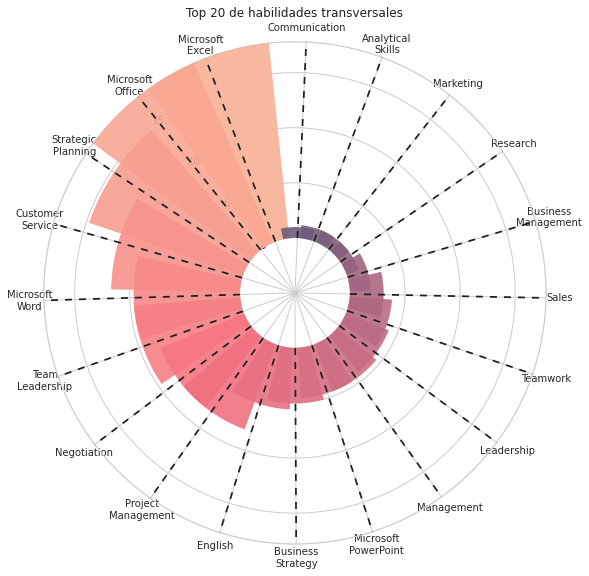

In [20]:
# Radar plot
df_radar = dfidf.squeeze().sort_values(ascending=True).head(20)
df_radar = pd.DataFrame(df_radar)
df_radar = df_radar.reset_index()
df_radar.rename(columns={'index':'skill',0: 'idf'}, inplace=True)
df_sorted = df_radar.sort_values('idf')


df_sorted['n'] = df_sorted.index
df_sorted['idf'] = 1/df_sorted['idf']
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)
LENGTHS = df_sorted["idf"].values
MEAN_GAIN = df_sorted["idf"].values
REGION = df_sorted["skill"].values
TRACKS_N = df_sorted["n"].values

GREY12 = "#1f1f1f"
#plt.rcParams.update({"font.family": "Bell MT"})
plt.rcParams.update({"font.family": "DejaVu Sans"})
plt.rcParams["text.color"] = GREY12
plt.rc("axes", unicode_minus=False)
COLORS = ["#F8B195","#F67280","#C06C84","#6C5B7B"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())
COLORS = cmap(norm(TRACKS_N))
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-5, 17.8)
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)
ax.vlines(ANGLES, 0,18, color=GREY12, ls=(0, (4, 4)), zorder=11)
#ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=10);
ax.set_title("Top 20 de habilidades transversales")
;

## Anexos

Estos son experimentos o exploraciones que no aportaron mucho al análisis.

### Clustering de skills

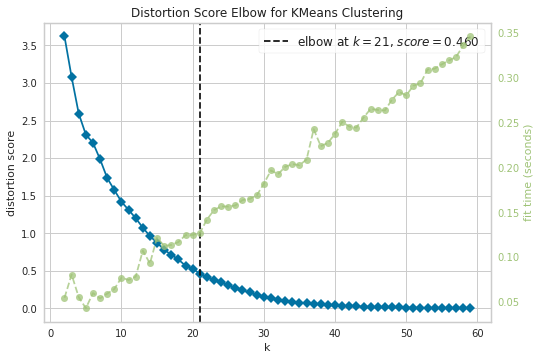

Número óptimo de clusters: 21


In [21]:
# Visualizamos la suma de errores cuadrados y sacamos el número óptimo de clusters
kmeans = KMeans(random_state=4)
visual = KElbowVisualizer(kmeans, k=(2, 60))
visual.fit(df_final)
visual.show()
optimal_clusters = visual.elbow_value_
print("Número óptimo de clusters: " + str(optimal_clusters))

### Clustering

In [22]:
n_clusters = optimal_clusters
km_model = KMeans(n_clusters=n_clusters, max_iter=10, n_init=2, random_state=0)
X = df_final
km_model.fit(X)
Z = kmeans.predict(X)
centroides = km_model.cluster_centers_
etiquetas = km_model.labels_

In [23]:
pca = PCA()
pca.fit(X)

def compute_optimal_pca(array):
    for i in range(array.size):
        if(array[i]>=0.9): return (i+1)
    return 0
    
optimal_pca_components = compute_optimal_pca(np.cumsum(pca.explained_variance_ratio_))
optimal_pca_components

18

In [24]:
# K-means (from number of features in input matrix to n_clusters)
pca = PCA(n_components=optimal_pca_components)
pca.fit(X)
X_pca = pca.transform(X)
km_model.fit(X_pca)
centroides = km_model.cluster_centers_
etiquetas = km_model.labels_
etiquetas
#df_centers = pd.DataFrame(km_model.cluster_centers_, columns=['x', 'y'])

#plt.figure(figsize=(10,10))
#plt.suptitle('Clustering por PCA de skills')
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km_model.labels_, s=50, cmap='jet')
#plt.scatter(df_centers['x'], df_centers['y'], c='grey', s=1500, alpha=0.2);

array([11,  0,  0,  0, 14,  0,  0,  0,  0,  0,  4,  0,  0,  0,  7,  0,  0,
        0, 10,  0,  0,  0,  0,  0,  0,  0,  2,  1,  0, 20,  0,  0,  0,  0,
        0, 13,  5,  8,  0, 12,  6, 18,  0,  0,  0, 15, 17,  0,  3,  0,  0,
        0, 16, 19,  0,  0,  9,  0,  0,  0,  0], dtype=int32)

La técnica de clustering no está dando muy buenos resultados aún cuando estamos probando PCA (tampoco fue buena sin PCA). La agrupación que propone no aporta al estudio y tampoco es tan necesario reagrupar habilidades si ya hemos elegido agrupar por las industrias en sí.

Tenemos otro anexo sobre buscar correlación entre el ROA (después de calcularlo) y graduados de la ESPOL pero este notebook se esta poniendo demasiado grande se lo incluye aparte